In [1]:
%cd .. 

c:\Users\esper\Desktop\injury_forecasting


In [3]:
from src.plotting import set_plot_style
from src.eda import *
from src.config import DATA_DIR
from src.preprocessing import preprocess_federal_data
set_plot_style()

In [4]:
df = pd.read_csv(DATA_DIR / "raw"/ 'January2015toFebruary2025.csv', parse_dates=['EventDate'], low_memory=False)

In [5]:
df = preprocess_federal_data(df, exclude_states=['AMERICAN SAMOA', 'GUAM', 'NORTHERN MARIANA ISLANDS', 'VIRGIN ISLANDS'])

✅ Remaining records: 96393
✅ Unique states: 30


In [6]:
inspect_dataset(df)

+++ Dataset Overview +++


ID     UPA  EventDate  \
0  2015010015  931176 2015-01-01   
1  2015010016  930267 2015-01-01   
2  2015010018  929823 2015-01-01   
3  2015010019  929711 2015-01-01   
4  2015010020  929642 2015-01-01   
5  2015010021  929709 2015-01-01   
6  2015010022  932133 2015-01-01   
7  2015010023  930028 2015-01-02   
8  2015010024  930006 2015-01-02   
9  2015010025  933583 2015-01-02   

                                         Employer  \
0  FCI Otisville Federal Correctional Institution   
1                      Kalahari Manufacturing LLC   
2                 Schneider National Bulk Carrier   
3                       PEPSI BOTTLING GROUP INC.   
4                 North American Pipe Corporation   
5                            The Home Depot, Inc.   
6                                 Gopher Resource   
7                           Foster Trucking, Inc.   
8                               Trinidad Drilling   
9                             The Krystal Company   

                                  Address1 Address2         City  \
0                           Two Mile Drive      NaN    OTISVILLE   
1                       171 Progress Drive      NaN  LAKE DELTON   
2                      420 CORAOPOLIS ROAD      NaN   CORAOPOLIS   
3                        4541 HOUSTON AVE.      NaN        MACON   
4                    210 South Arch Street      NaN   JANESVILLE   
5                3031 NE Pine Island Road       NaN   CAPE CORAL   
6                          6505 Jewel Ave       NaN        TAMPA   
7  Wells Ranch, 3314-225-228, Tank Battery      NaN         GILL   
8                           38734 S CR 200      NaN     WOODWARD   
9                 6201 West Colonial Drive      NaN      ORLANDO   

          State      Zip  Latitude  ...  \
0      NEW YORK  10963.0     41.46  ...   
1     WISCONSIN  53940.0     43.59  ...   
2  PENNSYLVANIA  15108.0     40.49  ...   
3       GEORGIA  31206.0     32.77  ...   
4     WISCONSIN  53545.0     42.67  ...   
5       FLORIDA  33909.0     26.68  ...   
6       FLORIDA  33619.0     27.96  ...   
7      COLORADO  80624.0     40.47  ...   
8      OKLAHOMA  73801.0     36.42  ...   
9       FLORIDA  32808.0     28.55  ...   

                                     NatureTitle Part of Body  \
0                                      Fractures          513   
1             Second degree heat (thermal) burns          519   
2  Traumatic injuries and disorders, unspecified         9999   
3       Soreness, pain, hurt-nonspecified injury          510   
4                                      Fractures         4429   
5       Soreness, pain, hurt-nonspecified injury          422   
6                                    Amputations         4422   
7              Heat (thermal) burns, unspecified         9999   
8  Traumatic injuries and disorders, unspecified         9999   
9                                    Amputations         4422   

                 Part of Body Title  Event  \
0                      Lower leg(s)   1214   
1                    Leg(s), n.e.c.    317   
2                   Nonclassifiable   4331   
3               Leg(s), unspecified    640   
4  Finger(s), fingernail(s), n.e.c.   6411   
5                          Elbow(s)    422   
6                      Fingertip(s)   6412   
7                   Nonclassifiable   9999   
8                   Nonclassifiable    620   
9                      Fingertip(s)   6252   

                                          EventTitle Source  \
0  Injured by physical contact with person while ...   5721   
1              Ignition of vapors, gases, or liquids   7261   
2         Other fall to lower level less than 6 feet   8421   
3  Caught in or compressed by equipment or object...   8623   
4  Caught in running equipment or machinery durin...    350   
5                Fall on same level due to slipping     660   
6  Caught in running equipment or machinery durin...    370   
7                                    Nonclassifiable   9999   
8         Struck 

The dataset contains 96393 rows and 27 columns

General Info
<class 'pandas.core.frame.DataFrame'>
Index: 96393 entries, 0 to 98800
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      96393 non-null  int64         
 1   UPA                     96393 non-null  int64         
 2   EventDate               96393 non-null  datetime64[ns]
 3   Employer                96393 non-null  object        
 4   Address1                96377 non-null  object        
 5   Address2                8197 non-null   object        
 6   City                    96378 non-null  object        
 7   State                   96393 non-null  object        
 8   Zip                     96372 non-null  float64       
 9   Latitude                96283 non-null  float64       
 10  Longitude               96283 non-null  float64       
 11  Primary NAICS           96392 non-null  object    

In [7]:
find_missing(df)

missing values  percentage missing
Address2                         88196           91.496270
Inspection                       63604           65.984044
Secondary Source Title           54035           56.056975
Secondary Source                 54035           56.056975
Longitude                          110            0.114116
Latitude                           110            0.114116
Zip                                 21            0.021786
Address1                            16            0.016599
City                                15            0.015561
Amputation                           7            0.007262
Primary NAICS                        1            0.001037
State                                0            0.000000
Employer                             0            0.000000
UPA                                  0            0.000000
EventDate                            0            0.000000
ID                                   0            0.000000
Nature                               0            0.000000
Final Narrative                      0            0.000000
Hospitalized                         0            0.000000
Part of Body                         0            0.000000
NatureTitle                          0            0.000000
Part of Body Title                   0            0.000000
Event                                0            0.000000
Source                               0            0.000000
EventTitle                           0            0.000000
SourceTitle                          0            0.000000
FederalState                         0            0.000000

In [10]:
df = df.drop(columns=["Address2", "Inspection", "Secondary Source Title", "Secondary Source"])

+++ General time-related stats for 2015 +++
First date: 2015-01-01 00:00:00
Last date: 2015-12-31 00:00:00
Time span: 364 days 00:00:00 days
Unique dates: 365

Weekday distribution:
EventDate
Wednesday    1856
Tuesday      1784
Monday       1689
Thursday     1680
Friday       1411
Saturday      673
Sunday        476
Name: count, dtype: int64

Busiest day in 2015: 2015-09-02 (55 events)
+++ Stats for 2015 +++
Monthly reports: EventDate
1     833
2     734
3     823
4     778
5     761
6     808
7     932
8     823
9     866
10    778
11    720
12    713
dtype: int64
Daily counts: EventDate
2015-01-01     7
2015-01-02    15
2015-01-03     7
2015-01-04    15
2015-01-05    41
              ..
2015-12-27     8
2015-12-28    24
2015-12-29    26
2015-12-30    26
2015-12-31    18
Length: 365, dtype: int64
+++ General time-related stats for 2016 +++
First date: 2016-01-01 00:00:00
Last date: 2016-12-31 00:00:00
Time span: 365 days 00:00:00 days
Unique dates: 366

Weekday distribution:
EventDate

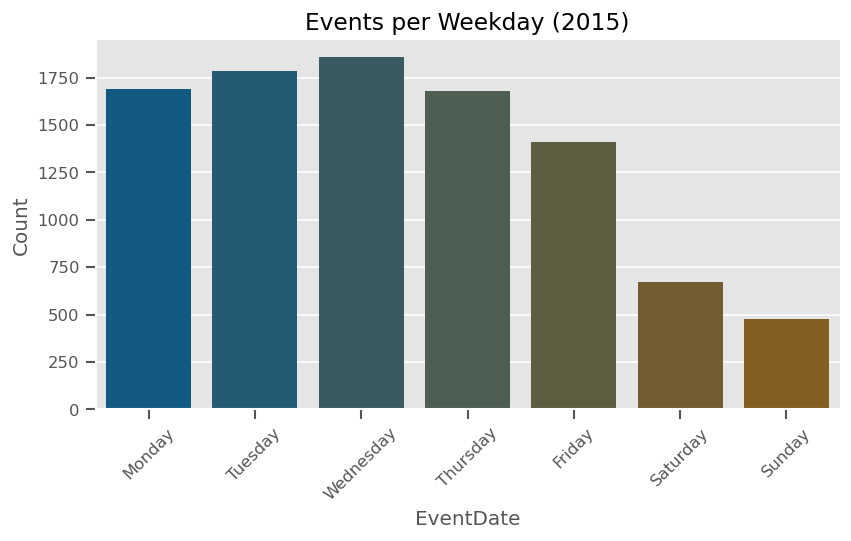

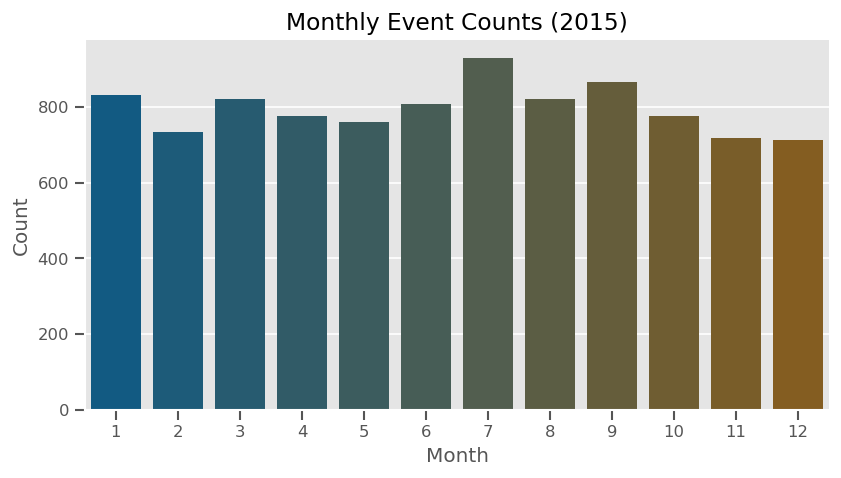

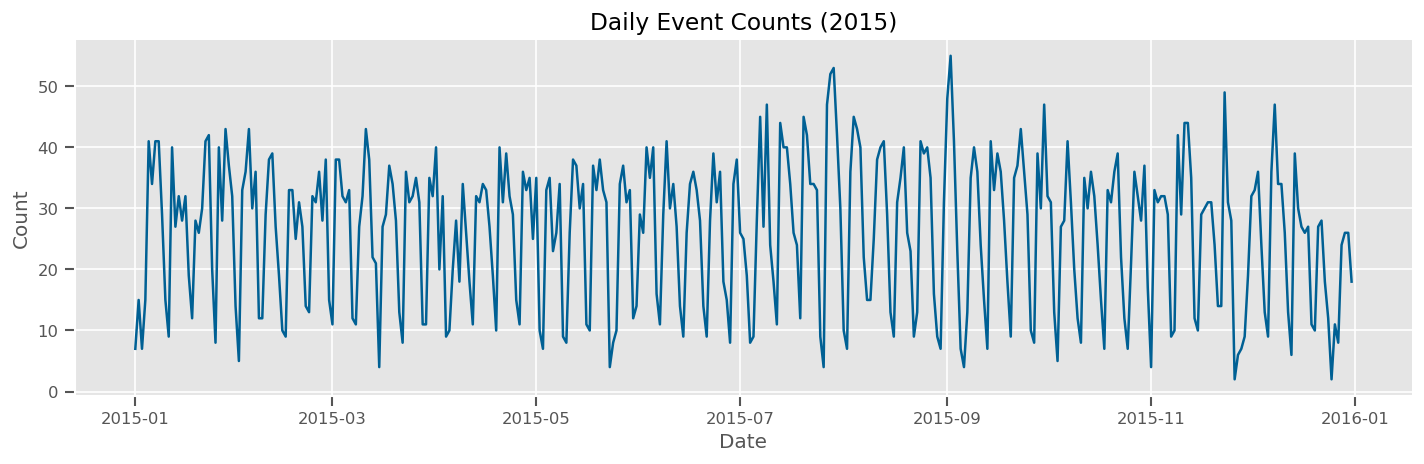

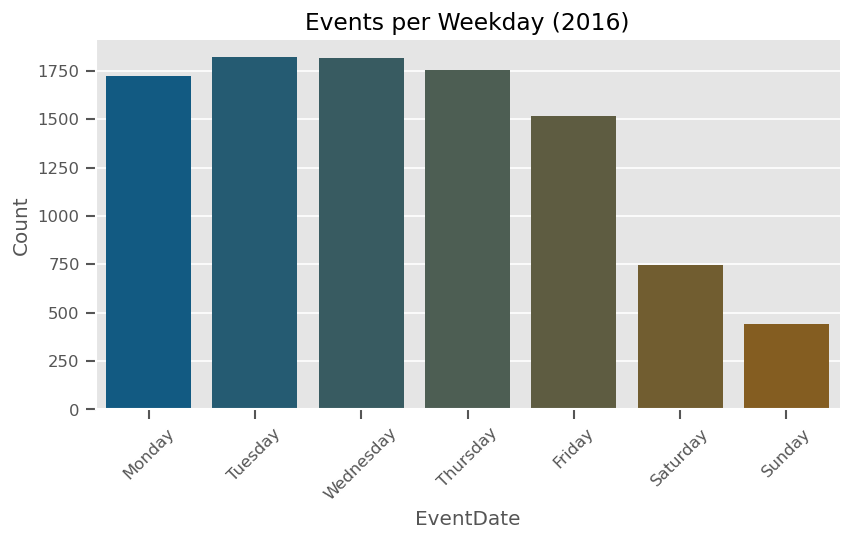

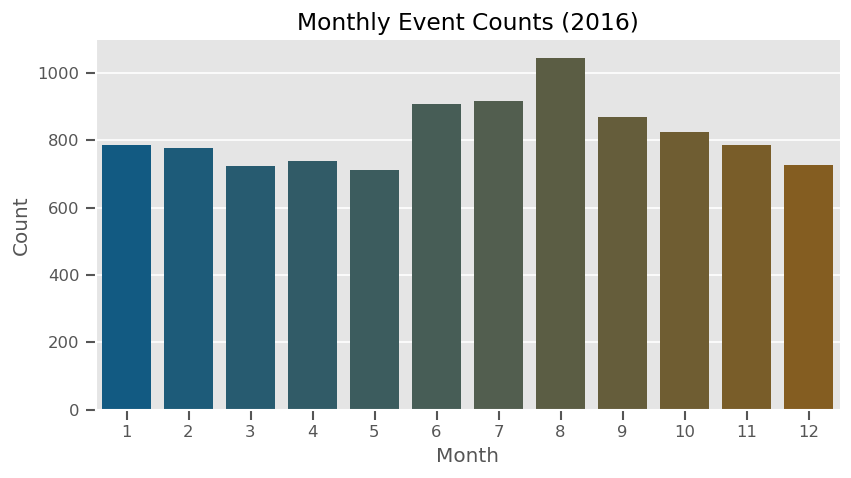

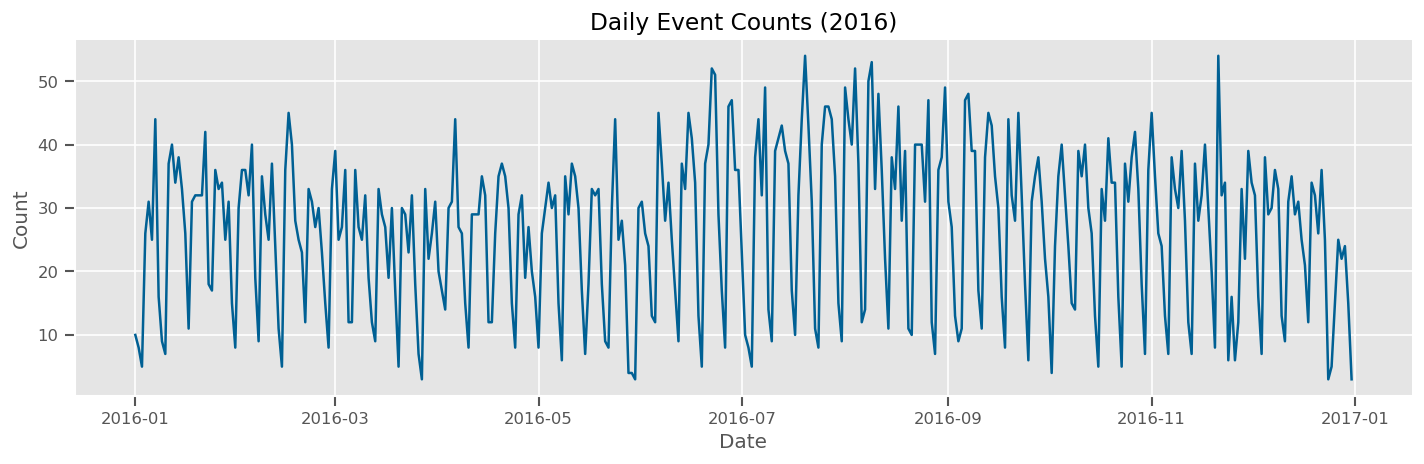

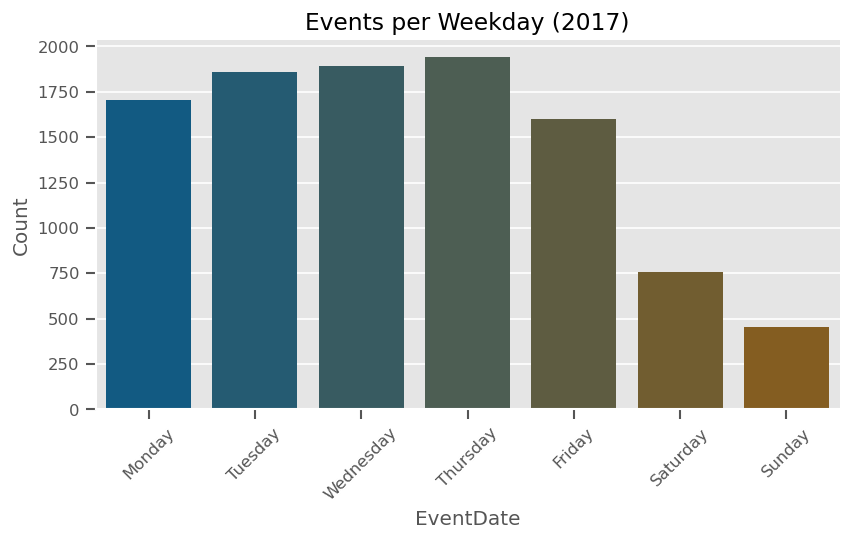

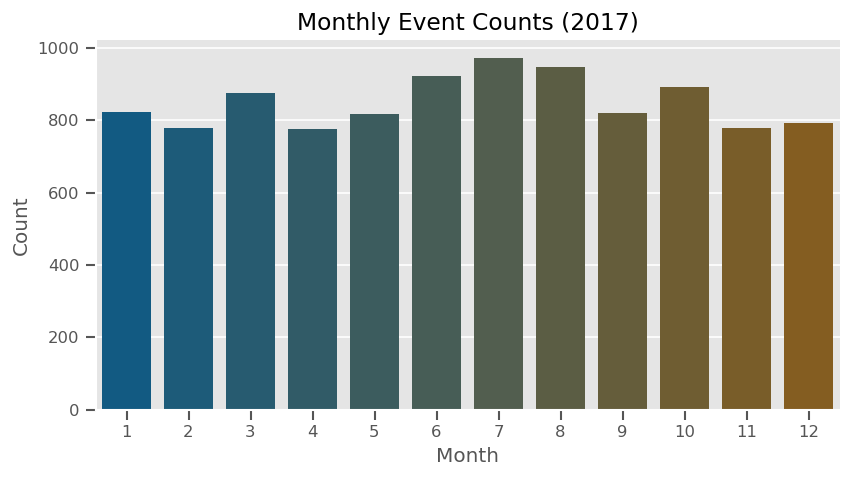

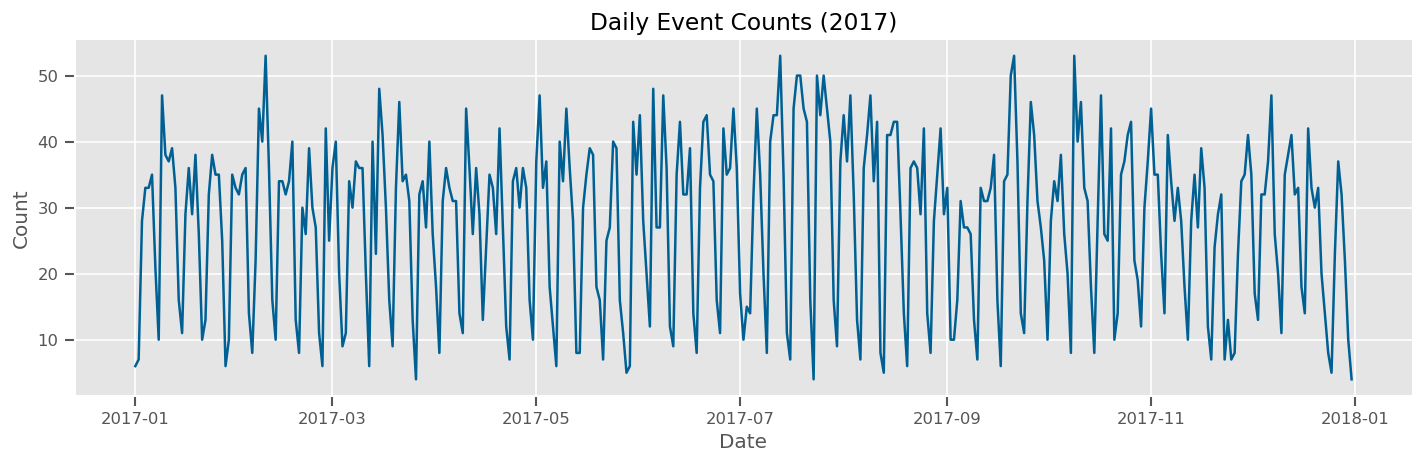

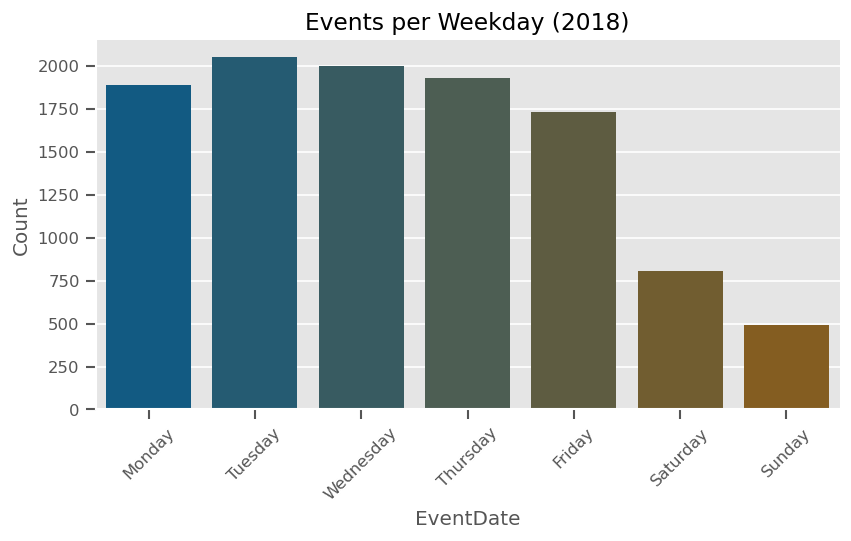

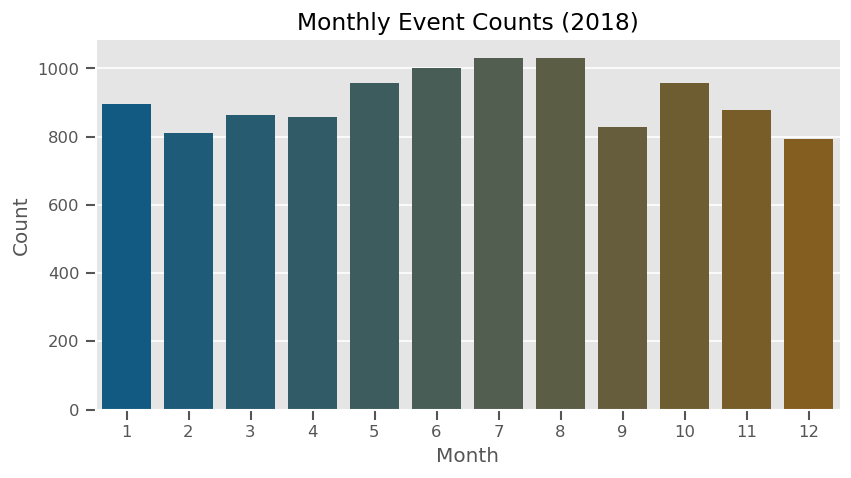

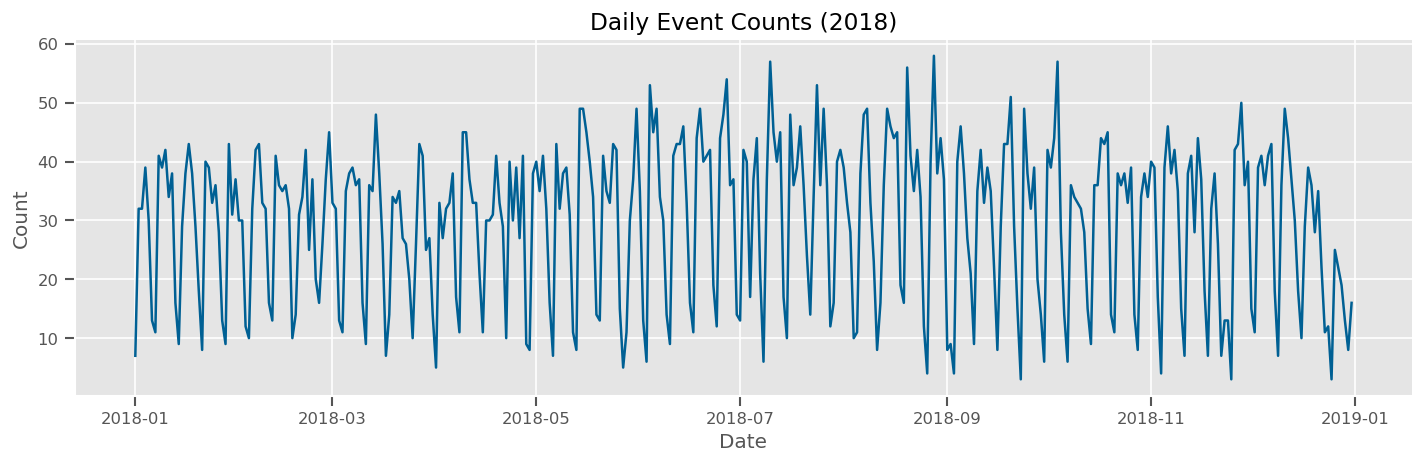

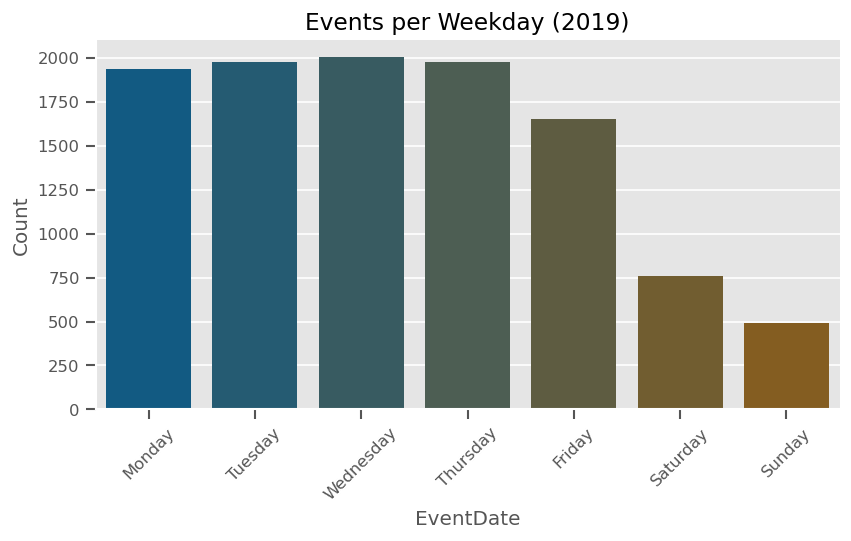

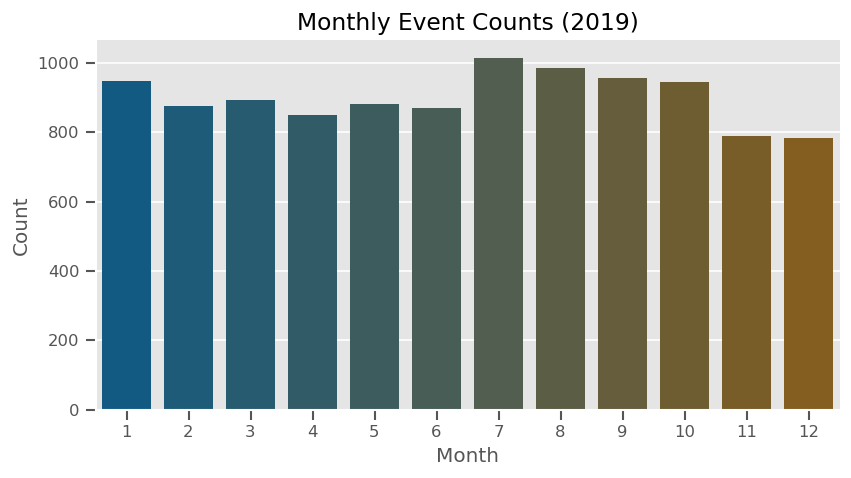

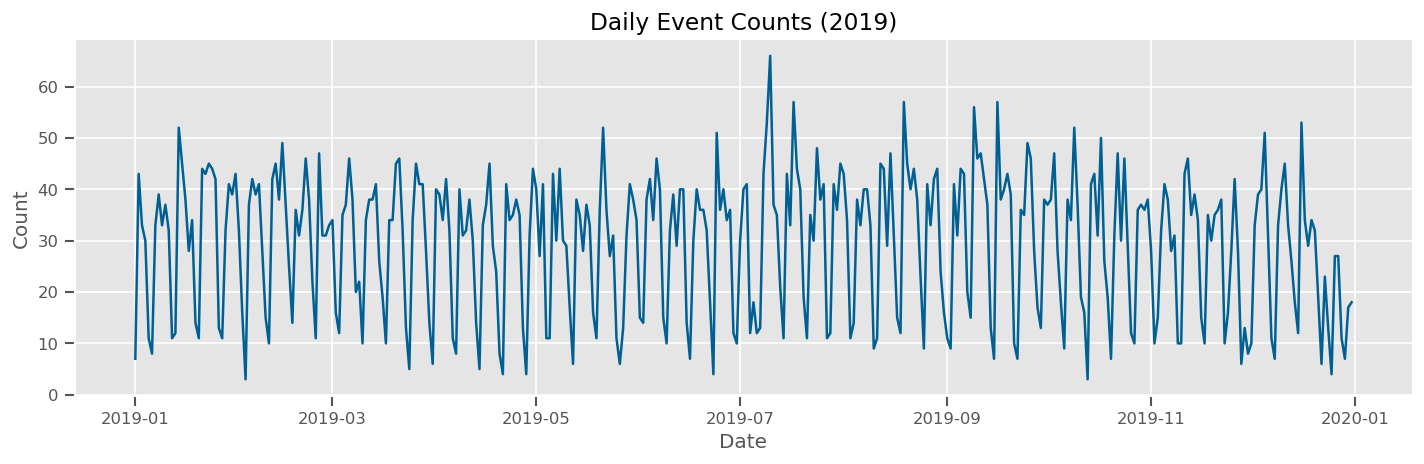

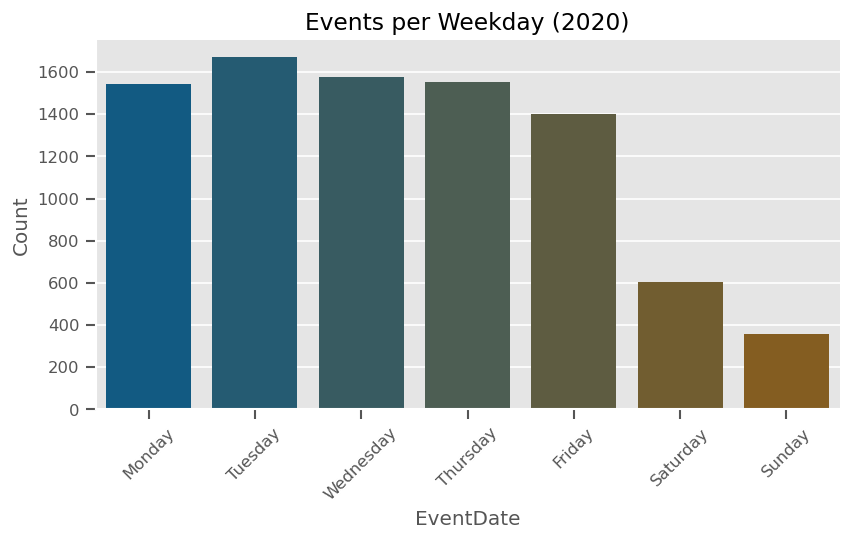

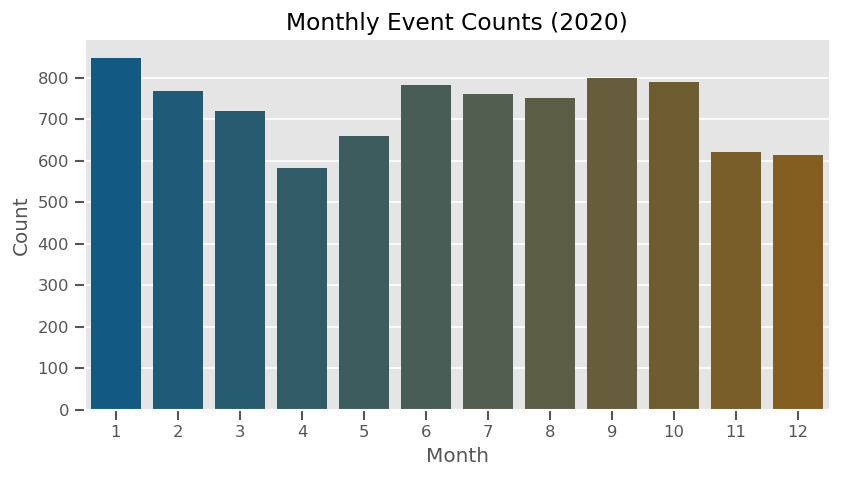

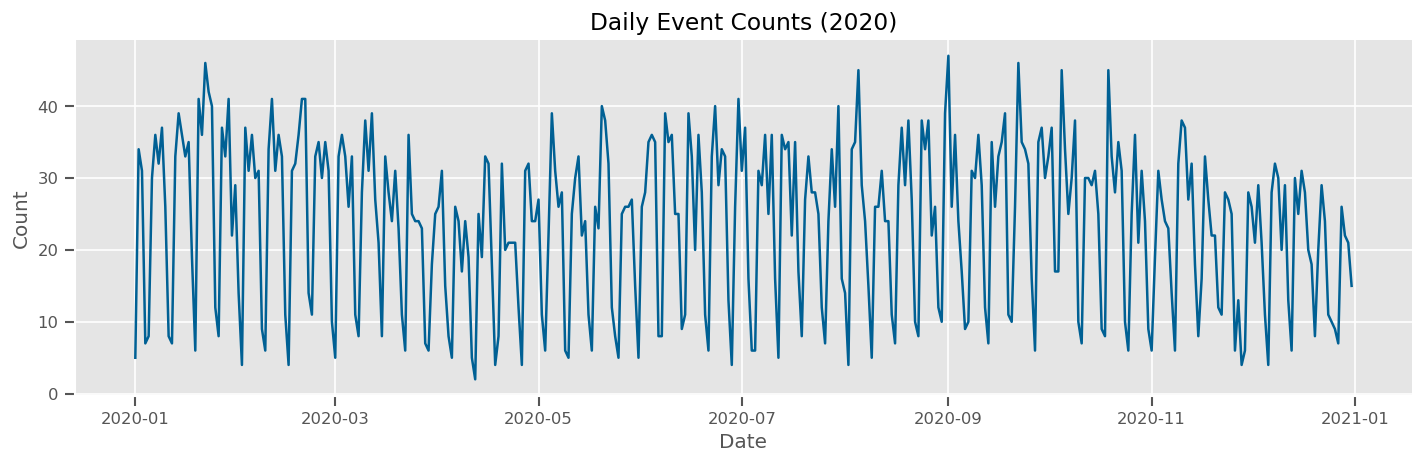

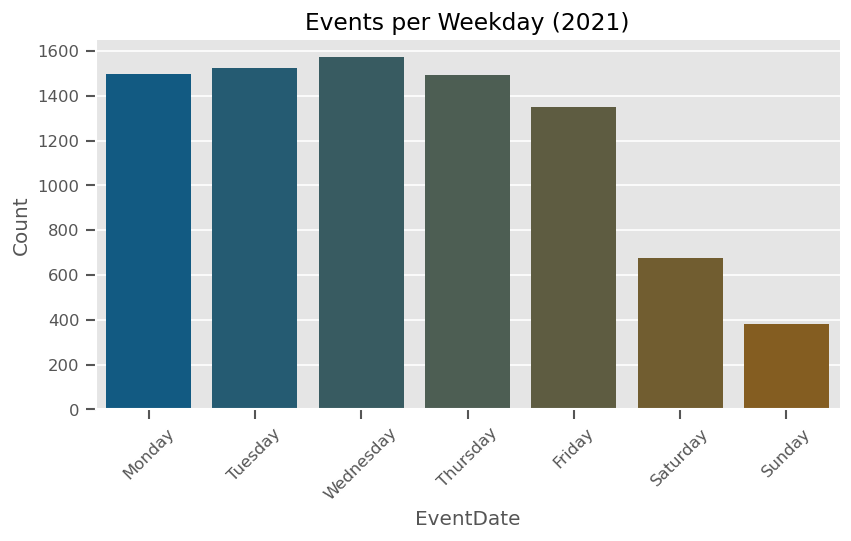

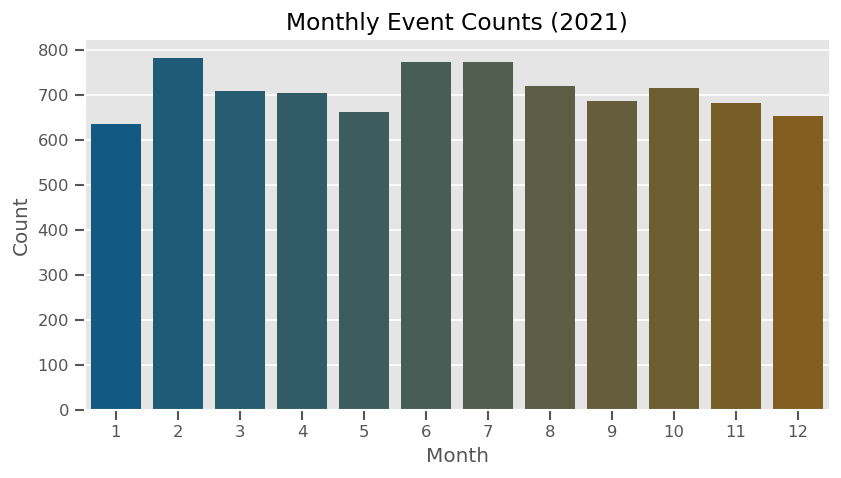

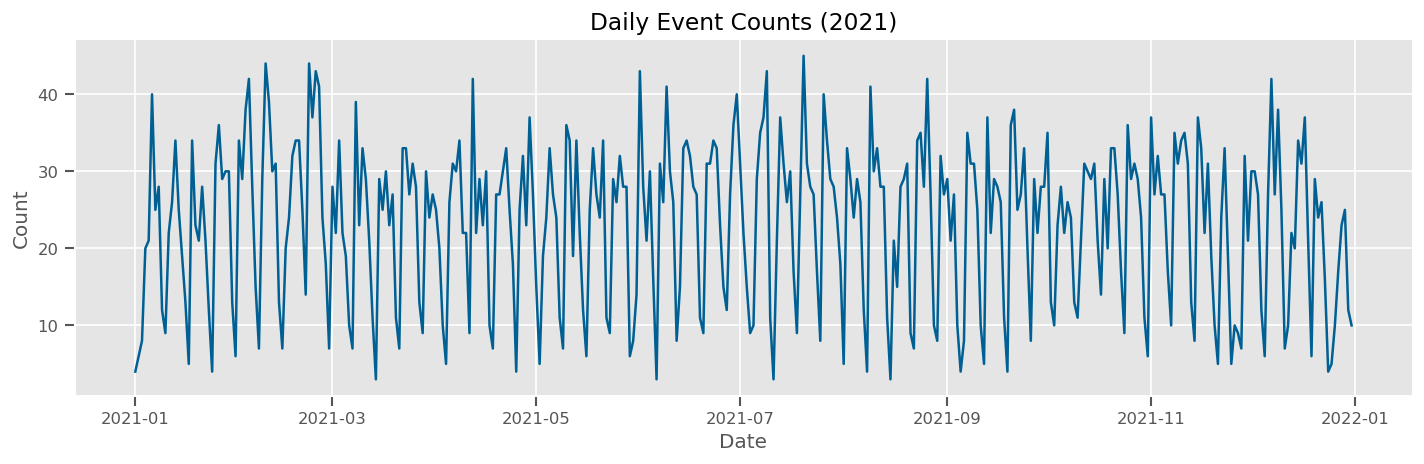

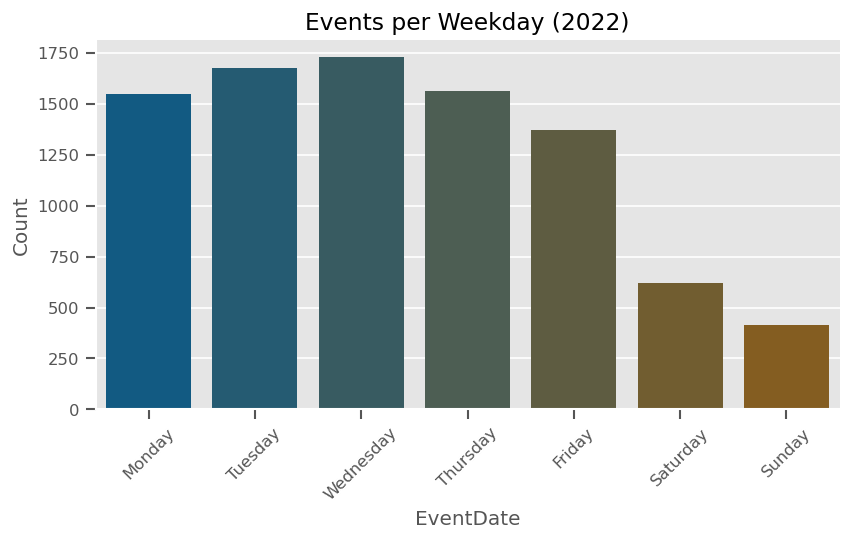

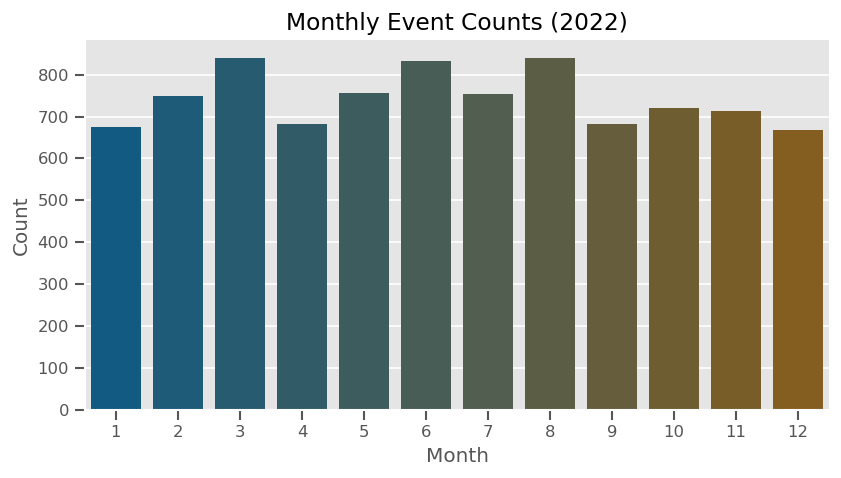

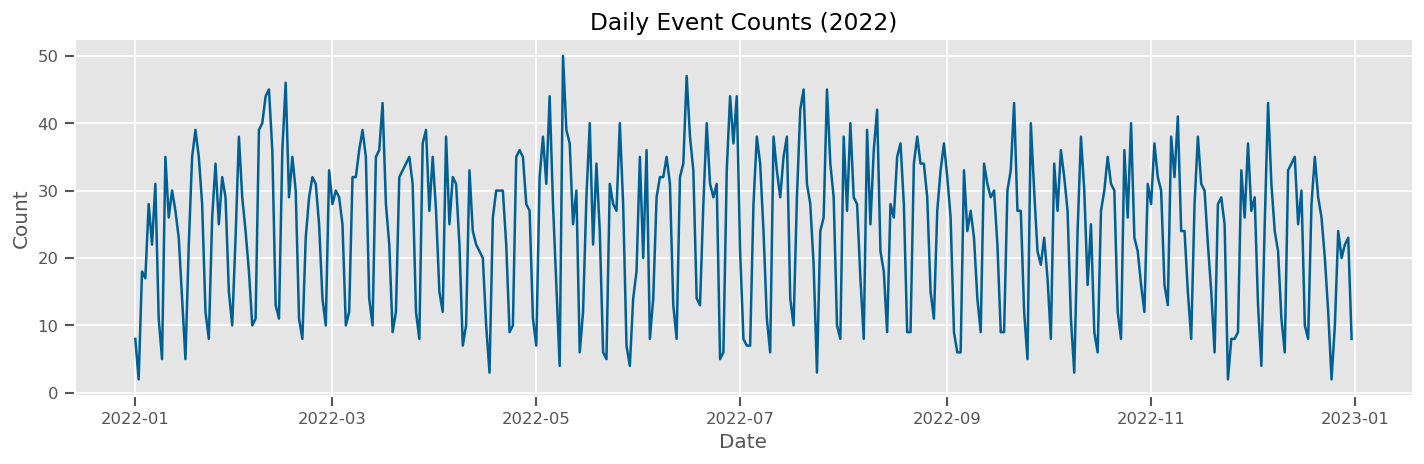

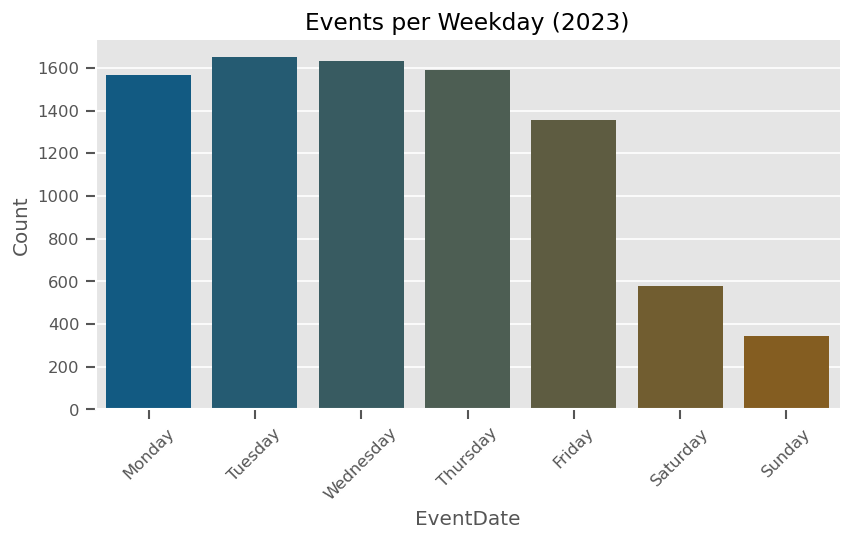

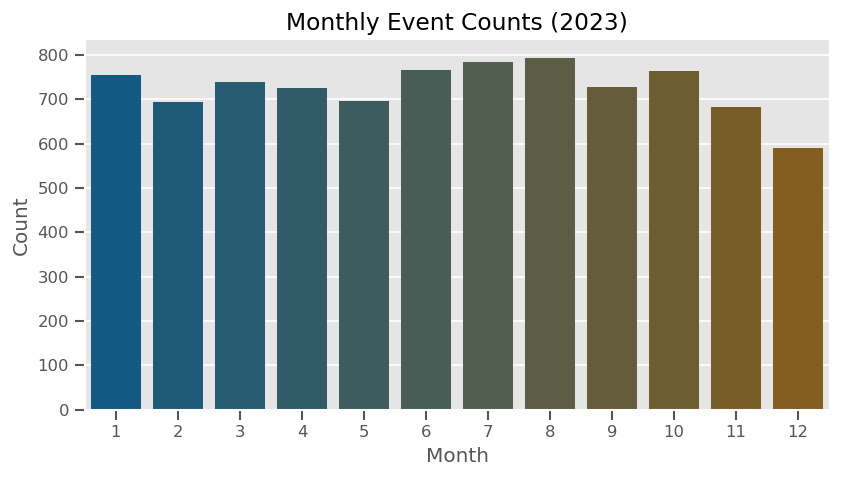

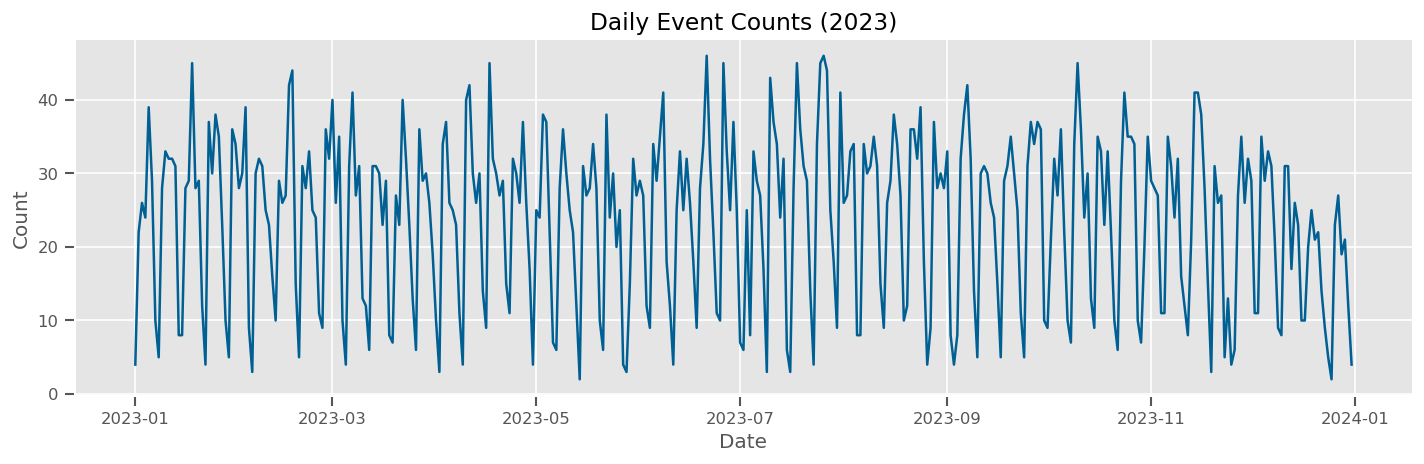

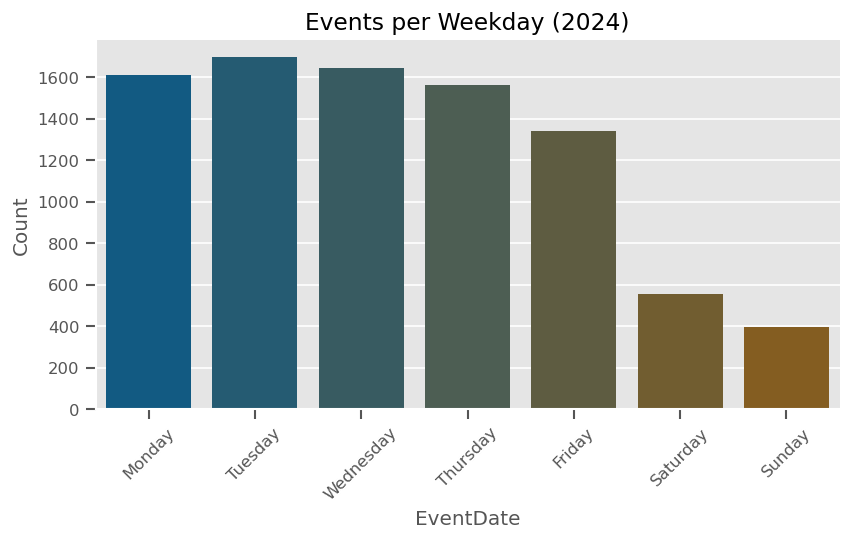

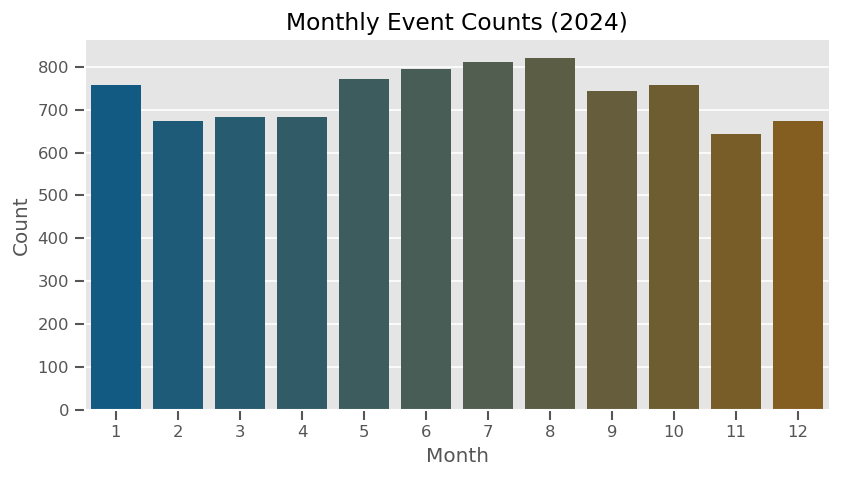

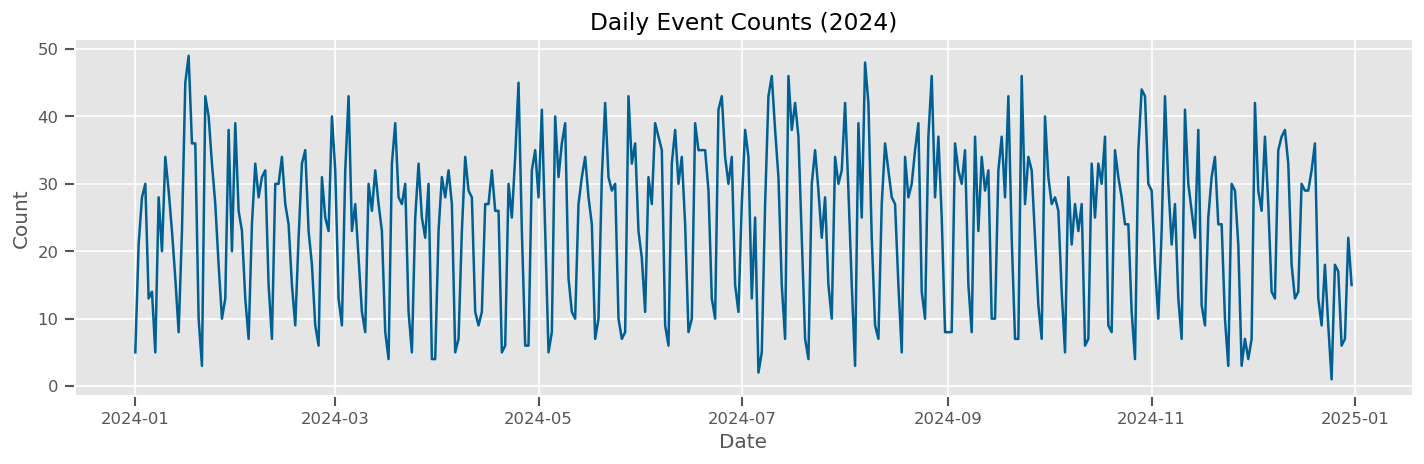

In [16]:
stats = {
    year: year_overview(df, year=year, date_col="EventDate")
    for year in range(2015, 2025)
}

for year in stats:
    plot_year_overview(stats=stats[year], year=year)


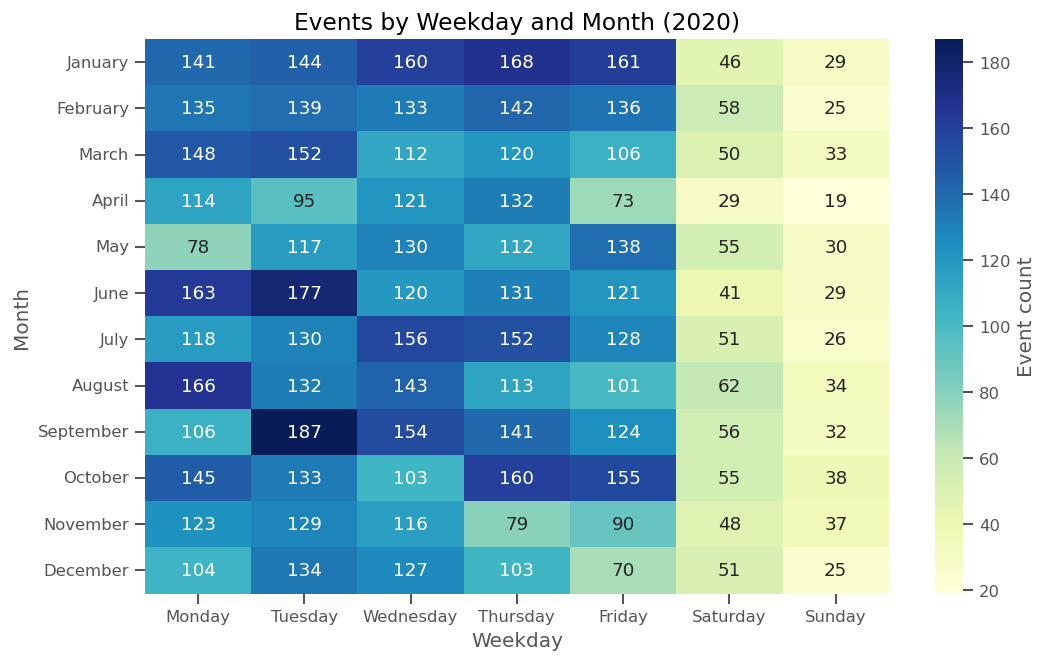

In [17]:
plot_weekday_month_heatmap(df, year=2020, column="EventDate")

In [20]:
stats_2024 = year_injuries_overview(df, date_col="EventDate", year=2024)
print(stats_2024)

+++ Injury stats for 2024 +++
First date: 2024-01-01 00:00:00
Last date: 2024-12-31 00:00:00
Time span: 365 days 00:00:00
Unique dates: 366
{'weekday_injuries':            Hospitalized  Amputation
EventDate                          
Monday             1300       424.0
Tuesday            1384       456.0
Wednesday          1344       441.0
Thursday           1243       449.0
Friday             1091       355.0
Saturday            459       149.0
Sunday              312       104.0, 'busiest_day': (datetime.date(2024, 8, 7), 55.0), 'monthly_injuries':            Hospitalized  Amputation
EventDate                          
1                   611       222.0
2                   544       196.0
3                   548       187.0
4                   535       189.0
5                   624       225.0
6                   634       213.0
7                   669       196.0
8                   673       207.0
9                   613       185.0
10                  604       211.0
11          

In [21]:
from src.config import FIGURES_DIR

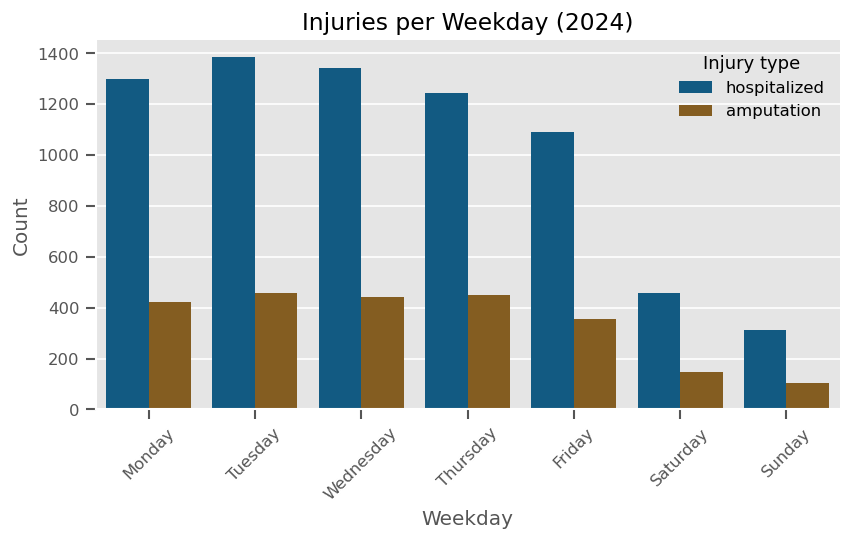

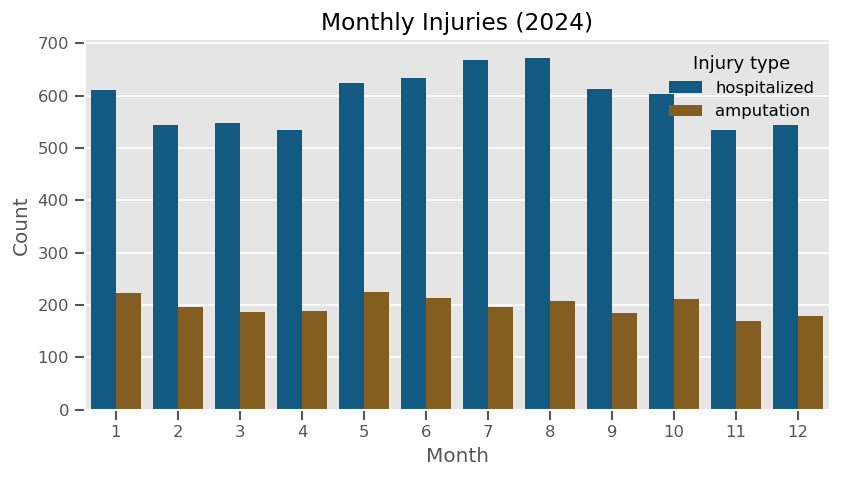

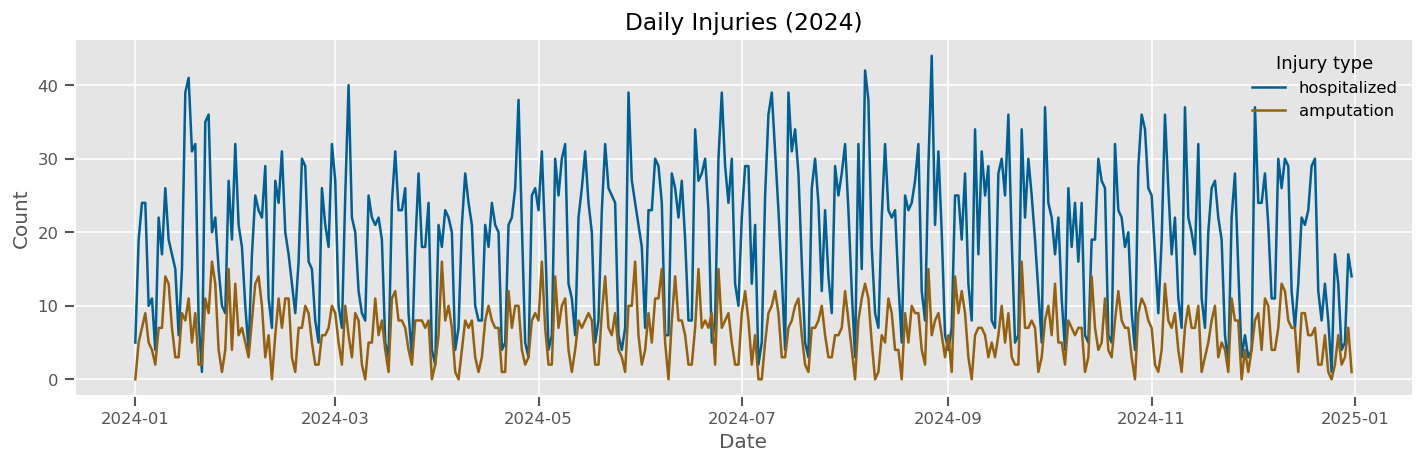

In [22]:
plot_year_injuries_overview(stats_2024, year=2024, save_dir=FIGURES_DIR / "eda")

## Categorical features

In [23]:
nature_map = {
    "11": "Unspecified traumatic injuries",
    "12": "Open wounds",
    "13": "Fractures",
    "14": "Dislocations",
    "15": "Sprains/Strains/Tears",
    "16": "Intracranial & internal injuries",
    "17": "Amputations",
    "18": "Burns/Corrosions/Scalds",
    "19": "Other traumatic injuries"
}

In [24]:
df["NatureGroup"] = (
    df["Nature"].astype(str).str[:2]
)

# Map to descriptive label
df["NatureGroupLabel"] = (
    df["NatureGroup"].map(nature_map).fillna("Other/Unclassified")
)

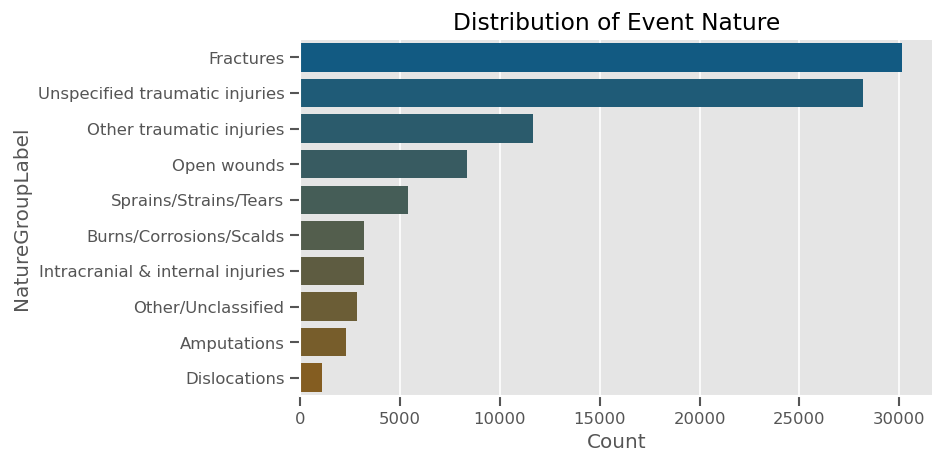

In [25]:
plot_category_distribution(df["NatureGroupLabel"], 
                           title="Distribution of Event Nature", save_dir=FIGURES_DIR / "eda")

In [26]:
# Map first digit → OIICS division
part_map = {
    "1": "Head",
    "2": "Neck",
    "3": "Trunk",
    "4": "Upper Extremities",
    "5": "Lower Extremities",
    "6": "Body Systems",
    "8": "Multiple Body Parts",
    "9": "Other/Unclassified"
}

# Ensure PartOfBody is string and get first digit
df["BodyPartDivision"] = (
    df["Part of Body"].astype(str).str[0].map(part_map)
)

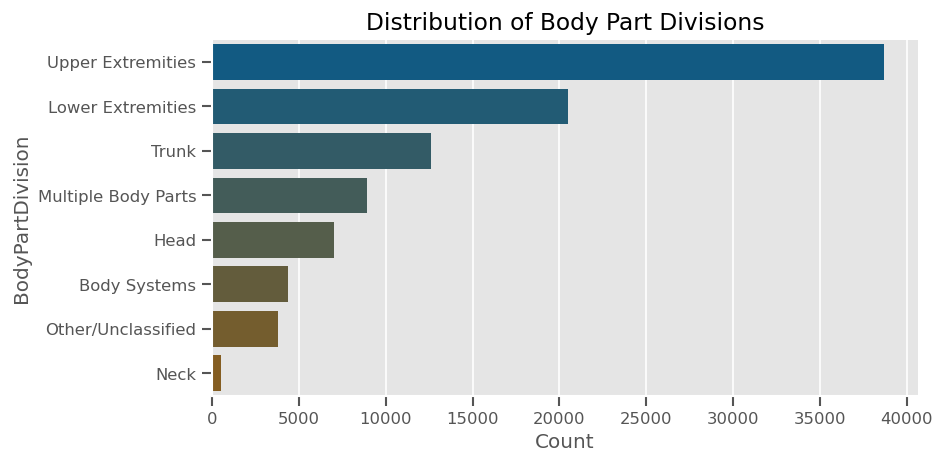

In [27]:
plot_category_distribution(df["BodyPartDivision"], title="Distribution of Body Part Divisions", save_dir=FIGURES_DIR / "eda")

In [30]:
df.to_csv(DATA_DIR / "processed" / "federal_df.csv", index=False)

In [51]:
df['NAICS_2_Label']

0                        Public Administration
1         Manufacturing (Machinery/Electronic)
2        Transportation (Air/Rail/Specialized)
3                              Wholesale Trade
4                Manufacturing (Wood/Chemical)
                         ...                  
98796            Manufacturing (Wood/Chemical)
98797     Manufacturing (Machinery/Electronic)
98798          Health Care & Social Assistance
98799    Transportation (Air/Rail/Specialized)
98800             Manufacturing (Food/Textile)
Name: NAICS_2_Label, Length: 96393, dtype: object

In [45]:
NAICS_2_LABELS = {
    "11": "Agriculture, Forestry, Fishing & Hunting",
    "21": "Mining, Quarrying, Oil & Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing (Food/Textile)",
    "32": "Manufacturing (Wood/Chemical)",
    "33": "Manufacturing (Machinery/Electronic)",
    "42": "Wholesale Trade",
    "44": "Retail Trade (Stores)",
    "45": "Retail Trade (Nonstore)",
    "48": "Transportation (Air/Rail/Specialized)",
    "49": "Transportation (Ground)",
    "51": "Information",
    "52": "Finance & Insurance",
    "53": "Real Estate & Rental",
    "54": "Professional, Scientific & Technical Services",
    "55": "Management of Companies",
    "56": "Administrative & Support Services",
    "61": "Educational Services",
    "62": "Health Care & Social Assistance",
    "71": "Arts, Entertainment & Recreation",
    "72": "Accommodation & Food Services",
    "81": "Other Services",
    "92": "Public Administration",
    "99": "Unclassified"
}


In [52]:
import statsmodels.formula.api as smf

df["NAICS_2"] = df["Primary NAICS"].astype(str).str[:2]
df["NAICS_2_Label"] = df["NAICS_2"].map(NAICS_2_LABELS)
model = smf.ols("Hospitalized ~ C(NAICS_2)", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Hospitalized   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     276.7
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:                -46555.
No. Observations:               96393   AIC:                         9.316e+04
Df Residuals:                   96367   BIC:                         9.341e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8224      0.010  

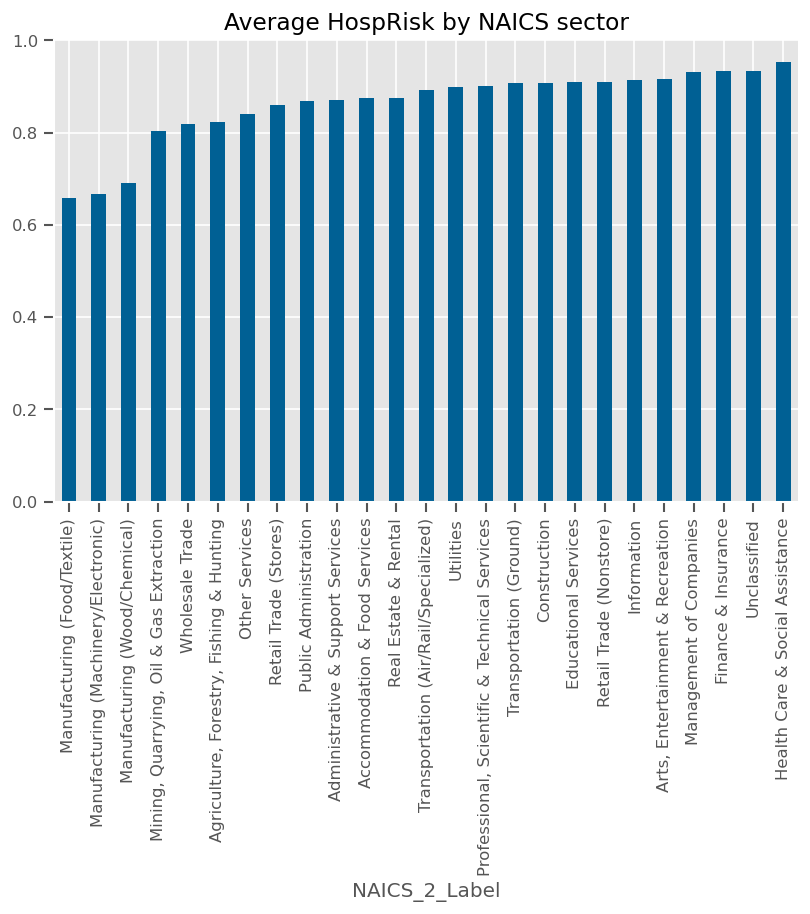

In [54]:
df.groupby("NAICS_2_Label")["Hospitalized"].mean().sort_values().plot(kind="bar")
plt.title("Average HospRisk by NAICS sector")
plt.show()


In [41]:
df['Primary NAICS'].isna().value_counts()


Primary NAICS
False    96392
True         1
Name: count, dtype: int64

In [43]:
!pip install squarify

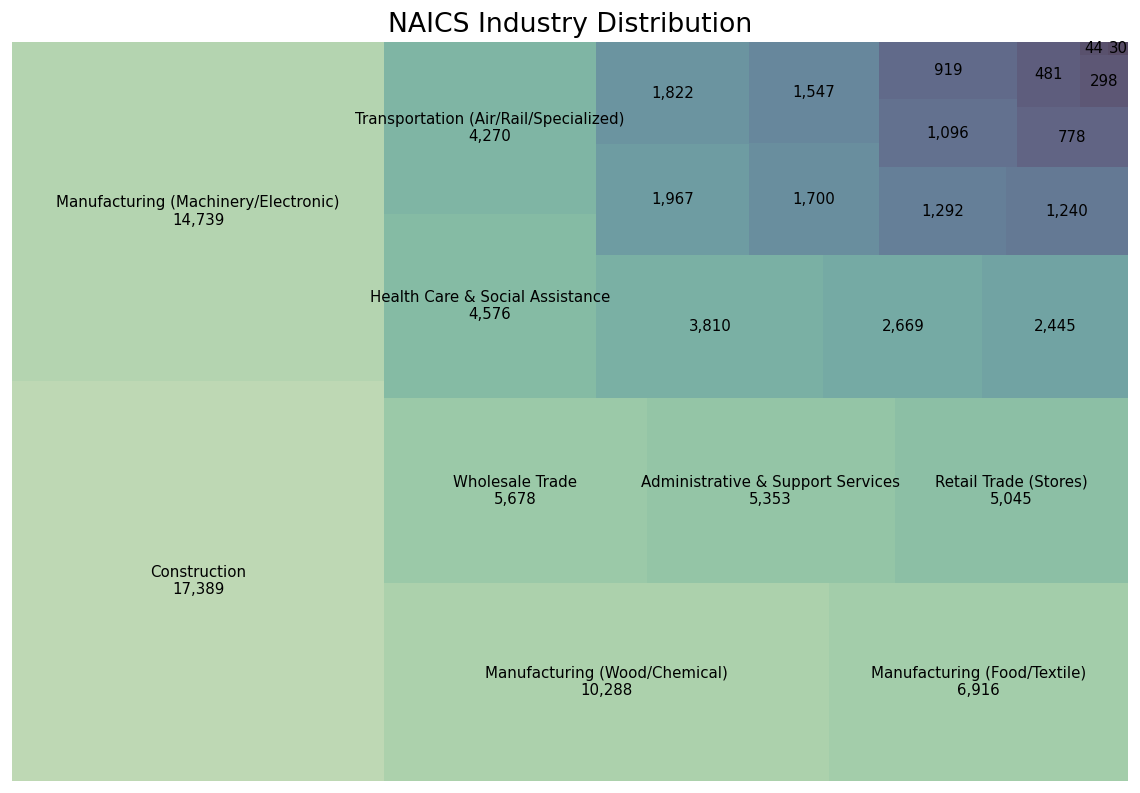

In [65]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts
counts = df["NAICS_2_Label"].value_counts()

# How many biggest categories get full label + count
top_k = 9  # ← change this if you want more/less fully labeled squares

# Determine which categories are "big"
full_label_categories = set(counts.index[:top_k])

sizes = counts.values
cats = counts.index
vals = counts.values

# Build labels: name + count for biggest, only count for others
labels = []
for cat, val in zip(cats, vals):
    if cat in full_label_categories:
        labels.append(f"{cat}\n{val:,}")
    else:
        labels.append(f"{val:,}")

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.8,
    color=sns.cubehelix_palette(len(counts), start=0.5, rot=-0.75, light=0.75),
    text_kwargs={"fontsize": 9}
)
plt.title("NAICS Industry Distribution", fontsize=16)
plt.axis("off")
plt.show()


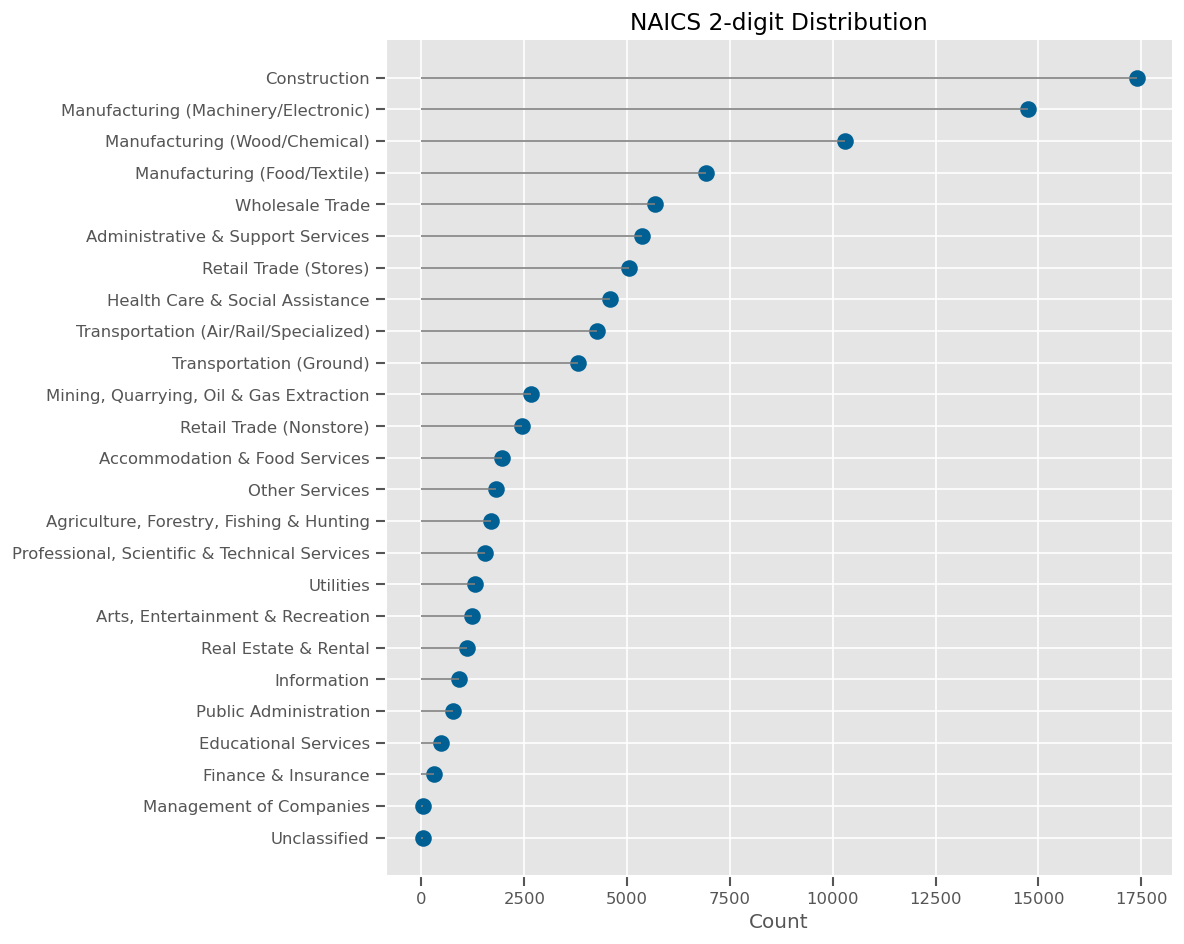

In [67]:
import matplotlib.pyplot as plt
import numpy as np

counts = df["NAICS_2_Label"].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
y = np.arange(len(counts))

ax.hlines(y=y, xmin=0, xmax=counts.values, color="gray", linewidth=1)
ax.scatter(counts.values, y, s=80, color="#006094")

ax.set_yticks(y)
ax.set_yticklabels(counts.index)
ax.set_xlabel("Count")
ax.set_title("NAICS 2-digit Distribution", fontsize=14)

plt.tight_layout()
plt.show()


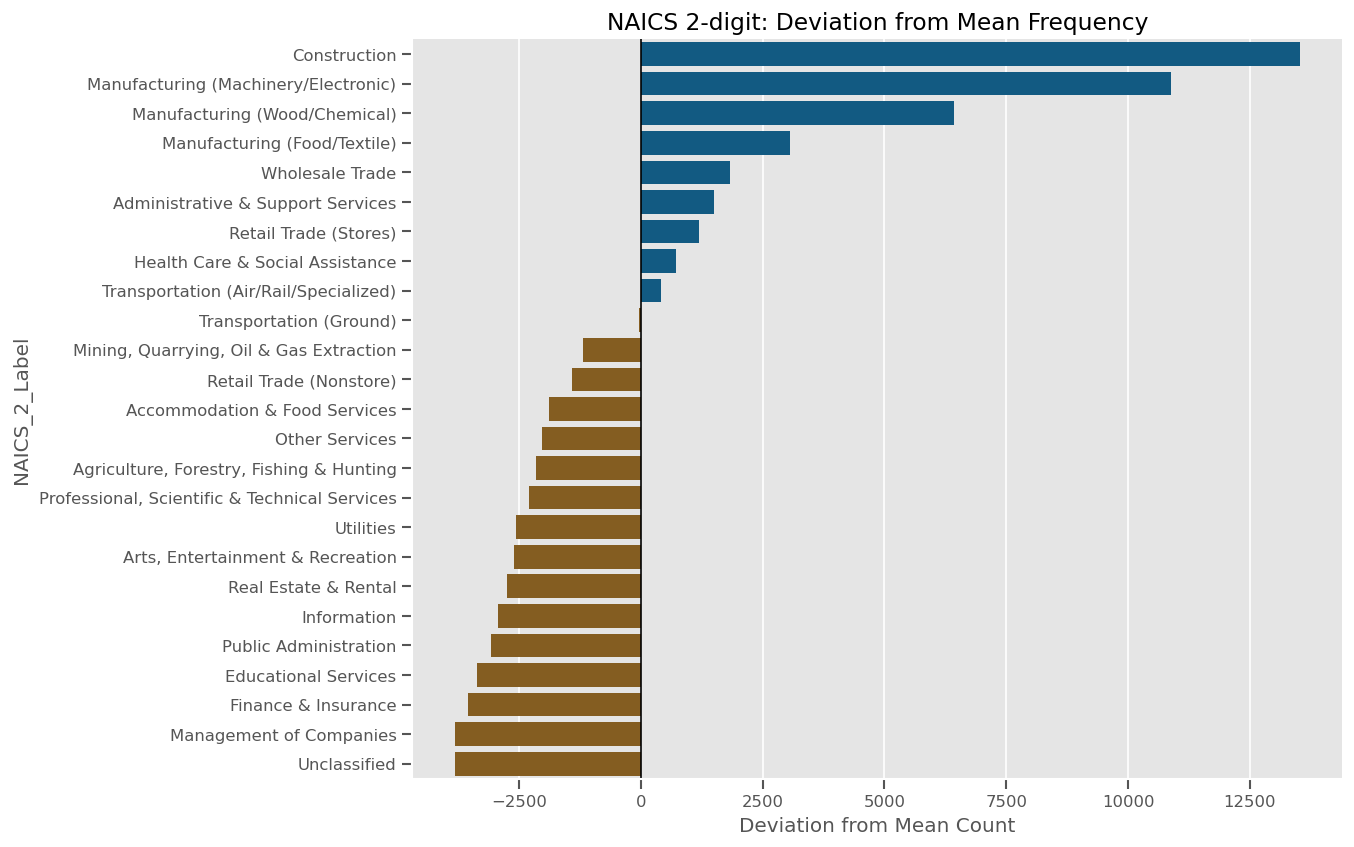

In [68]:
import seaborn as sns

counts = df["NAICS_2_Label"].value_counts()
mean_val = counts.mean()
diff = counts - mean_val

plt.figure(figsize=(10, 8))
sns.barplot(
    x=diff.values,
    y=diff.index,
    hue=(diff.values > 0),
    palette=["#946110", "#006094"],
    dodge=False,
    legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.title("NAICS 2-digit: Deviation from Mean Frequency")
plt.xlabel("Deviation from Mean Count")
plt.show()


## Target distribution

In [73]:
df_monthly = (
    df.set_index("EventDate")
      .resample("ME")[["Hospitalized", "Amputation"]]
      .sum()
)
df_monthly.index = df_monthly.index.to_period("M").to_timestamp()
df_monthly.head()


Hospitalized  Amputation
EventDate                           
2015-01-01           673       227.0
2015-02-01           623       174.0
2015-03-01           664       221.0
2015-04-01           612       226.0
2015-05-01           611       196.0

In [74]:
df_monthly_state = (
    df.set_index("EventDate")
      .groupby("State")[["Hospitalized", "Amputation"]]
      .resample("ME")
      .sum()
      .reset_index()
)


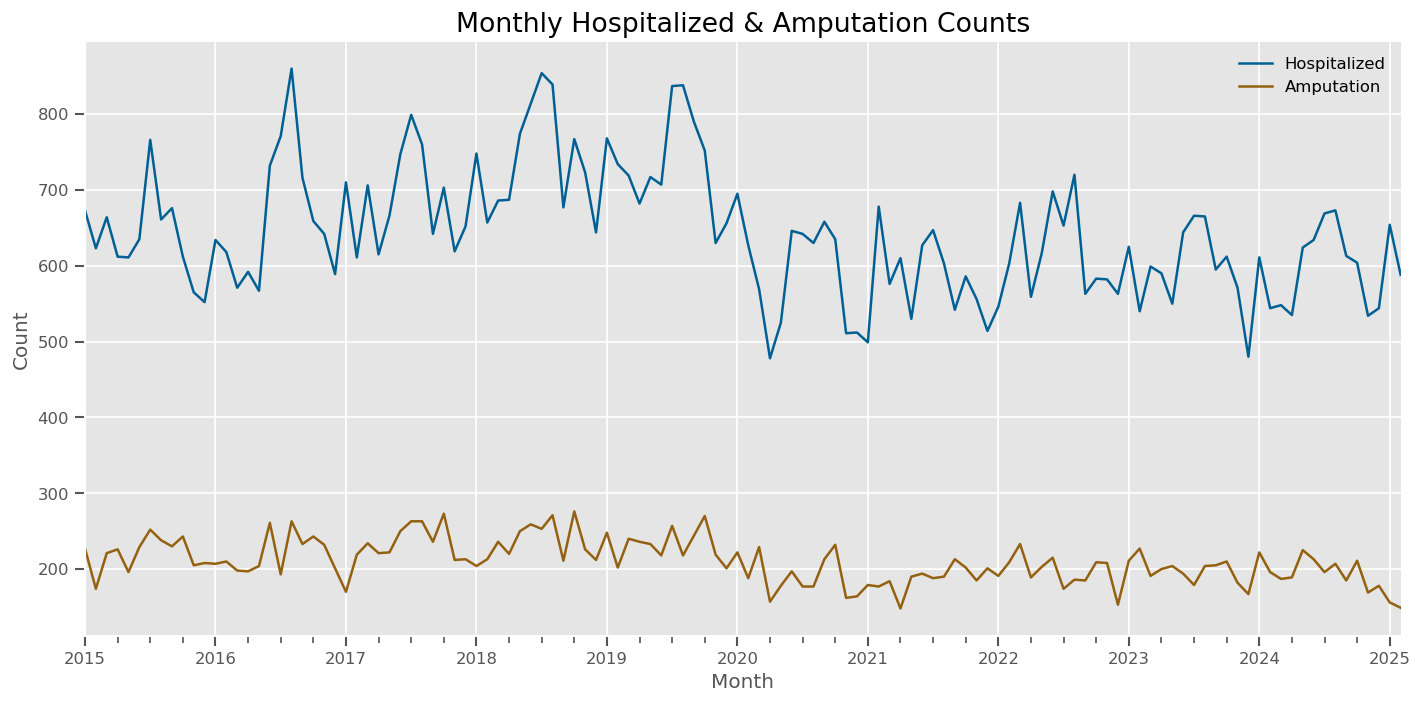

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
df_monthly.plot(ax=ax)
ax.set_title("Monthly Hospitalized & Amputation Counts", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


In [100]:
import calendar
from typing import Iterable, Optional, Union

def plot_monthly_seasonality(
    df: pd.DataFrame,
    date_col: str = "Date",
    value_col: Optional[str] = None,
    agg: str = "count",
    years: Optional[Union[int, Iterable[int]]] = None,
) -> pd.DataFrame:
    """
    Plot seasonal pattern at a monthly resolution, optionally for
    a single year or multiple years.

    If value_col is None, counts the number of rows (events) per month.
    Otherwise, aggregates the given value_col with `agg` (e.g. 'sum', 'mean').

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing a datetime column.
    date_col : str, default="Date"
        Name of the datetime column.
    value_col : str or None, default=None
        Column to aggregate. If None, row counts are used.
    agg : str, default="count"
        Aggregation function ('count', 'sum', 'mean', ...).
    years : int or iterable of int or None, default=None
        - None  → use all available years
        - int   → plot only that year
        - iterable[int] → plot those years on the same figure

    Returns
    -------
    monthly : pd.DataFrame
        DataFrame with columns ['Year', 'Month', 'value'] used for plotting.
    """
    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    df_["Year"] = df_[date_col].dt.year
    df_["Month"] = df_[date_col].dt.month

    # --------- Aggregate ---------
    if value_col is None:
        monthly = (
            df_.groupby(["Year", "Month"])
               .size()
               .reset_index(name="value")
        )
        y_label = "Number of events"
    else:
        monthly = (
            df_.groupby(["Year", "Month"])[value_col]
               .agg(agg)
               .reset_index(name="value")
        )
        y_label = f"{agg.capitalize()} of {value_col}"

    # --------- Filter by year(s) if requested ---------
    if years is not None:
        if isinstance(years, (int, np.integer)):
            years = [int(years)]
        else:
            years = list(years)
        monthly = monthly[monthly["Year"].isin(years)]

    # If filtering removed everything, warn early
    if monthly.empty:
        raise ValueError("No data available for the specified year(s).")

    # --------- Plot ---------
    fig, ax = plt.subplots(figsize=(10, 6))

    for year, group in monthly.groupby("Year"):
        group_sorted = group.sort_values("Month")
        ax.plot(
            group_sorted["Month"],
            group_sorted["value"],
            marker="o",
            alpha=0.8,
            label=str(year),
        )

    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(calendar.month_abbr[1:13])
    ax.set_xlabel("Month")
    ax.set_ylabel(y_label)

    # Dynamic title depending on years
    if years is None:
        title_years = "all years"
    else:
        title_years = ", ".join(str(y) for y in sorted(set(years)))
    ax.set_title(f"Seasonal pattern at monthly resolution ({title_years})", fontsize=14)

    ax.grid(alpha=0.3)
    ax.legend(title="Year", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)

    plt.tight_layout()
    plt.show()

    return monthly


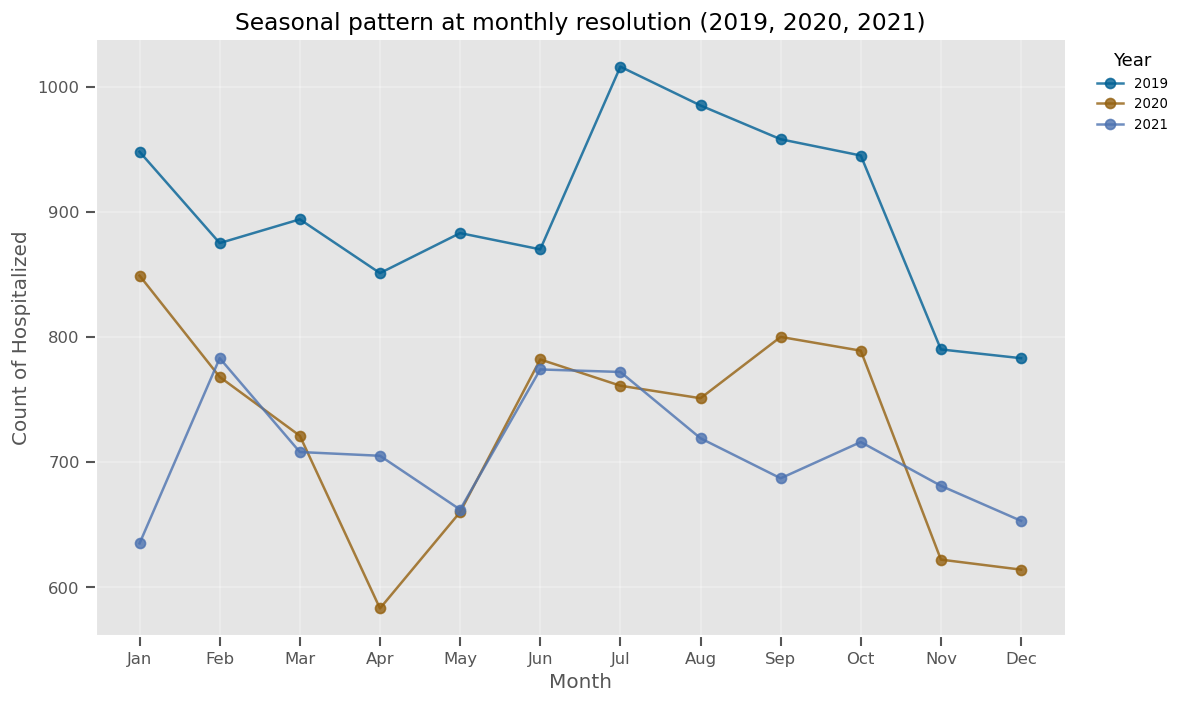

Year  Month  value
48  2019      1    948
49  2019      2    875
50  2019      3    894
51  2019      4    851
52  2019      5    883
53  2019      6    870
54  2019      7   1016
55  2019      8    985
56  2019      9    958
57  2019     10    945
58  2019     11    790
59  2019     12    783
60  2020      1    849
61  2020      2    768
62  2020      3    721
63  2020      4    583
64  2020      5    660
65  2020      6    782
66  2020      7    761
67  2020      8    751
68  2020      9    800
69  2020     10    789
70  2020     11    622
71  2020     12    614
72  2021      1    635
73  2021      2    783
74  2021      3    708
75  2021      4    705
76  2021      5    662
77  2021      6    774
78  2021      7    772
79  2021      8    719
80  2021      9    687
81  2021     10    716
82  2021     11    681
83  2021     12    653

In [101]:
plot_monthly_seasonality(df, date_col="EventDate", value_col="Hospitalized", years=[2019, 2020, 2021])


In [77]:
def _resolve_freq(agg_level: str) -> str:
    """
    Map a human-friendly aggregation level to a pandas frequency string.

    Parameters
    ----------
    agg_level : str
        Either 'monthly' or 'weekly' (case-insensitive).

    Returns
    -------
    str
        Pandas offset alias (e.g. 'M' or 'W').
    """
    level = agg_level.lower()
    if level in {"monthly", "month", "m"}:
        return "ME"   # month-end
    if level in {"weekly", "week", "w"}:
        return "W"   # weekly, default anchor (Sun)
    raise ValueError(f"Unsupported agg_level: {agg_level!r}. Use 'monthly' or 'weekly'.")


In [85]:
def plot_target_timeseries(
    df: pd.DataFrame,
    date_col: str = "EventDate",
    targets = ("Hospitalized", "Amputation"),
    agg_level: str = "monthly",
    agg: str = "sum",
    per_state: bool = False,
    state_col: str = "State",
) -> None:
    """
    Plot aggregated target time series at monthly or weekly level.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing a datetime column and numeric targets.
    date_col : str, default="Date"
        Name of the datetime column.
    targets : iterable of str, default=("Hospitalized", "Amputation")
        Target variable names to analyze.
    agg_level : str, default="monthly"
        Aggregation level: 'monthly' or 'weekly'.
    agg : str, default="sum"
        Aggregation function for resampling ('sum', 'mean', etc.).
    per_state : bool, default=False
        If False, aggregate over all states.
        If True, aggregate per state and plot one line per state.
    state_col : str, default="State"
        Column name for the state identifier when per_state=True.
    """
    freq = _resolve_freq(agg_level)

    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])
    df_.set_index(date_col, inplace=True)

    # ------------------------ global aggregation ------------------------
    if not per_state:
        agg_df = (
            df_[list(targets)]
            .resample(freq)
            .agg(agg)
        )

        fig, ax = plt.subplots(figsize=(12, 6))
        agg_df.plot(ax=ax)
        ax.set_title(f"{agg_level.capitalize()} {agg} targets over time", fontsize=16)
        ax.set_xlabel("Date")
        ax.set_ylabel("Value")
        ax.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        return

    # ------------------------ per-state aggregation ------------------------
    if state_col not in df_.columns:
        raise KeyError(f"state_col '{state_col}' not found in DataFrame.")

    agg_df = (
        df_
        .groupby(state_col)[list(targets)]
        .resample(freq)
        .agg(agg)
        .reset_index()
    )

    # For per_state, make one figure per target, lines = states
    for target in targets:
        fig, ax = plt.subplots(figsize=(12, 6))

        for state, group in agg_df.groupby(state_col):
            ax.plot(group[date_col], group[target], label=state, alpha=0.6)

        ax.set_title(
            f"{agg_level.capitalize()} {agg} {target} per {state_col}",
            fontsize=16,
        )
        ax.set_xlabel("Date")
        ax.set_ylabel(target)
        ax.grid(alpha=0.3)

        # With 50 states the legend can get big; feel free to comment this out.
        ax.legend(title=state_col, fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))

        plt.tight_layout()
        plt.show()


In [91]:
from scipy.stats import shapiro, anderson, skew, kurtosis

def _normality_tests(series: pd.Series) -> dict:
    """
    Run normality tests on a 1D numeric series.
    Returns a dictionary with results.
    """
    s = series.dropna()

    # Shapiro-Wilk
    sh_w, sh_p = shapiro(s)

    # Anderson-Darling
    ad_result = anderson(s)
    ad_stat = ad_result.statistic
    ad_crit = ad_result.critical_values
    ad_sig = ad_result.significance_level

    return {
        "shapiro_W": sh_w,
        "shapiro_p": sh_p,
        "anderson_stat": ad_stat,
        "anderson_crit": list(zip(ad_sig, ad_crit)),
        "skewness": skew(s),
        "kurtosis": kurtosis(s),
    }


In [94]:
import seaborn as sns

def plot_target_histograms(
    df: pd.DataFrame,
    date_col: str = "EventDate",
    targets = ("Hospitalized", "Amputation"),
    agg_level: str = "monthly",
    agg: str = "sum",
    per_state: bool = False,
    state_col: str = "State",
    bins: int = 30,
) -> None:
    """
    Plot side-by-side histograms with KDE for aggregated target values
    at monthly or weekly level, using a publication-ready style.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset with datetime and target columns.
    date_col : str, default="Date"
        Name of datetime column.
    targets : iterable of str, default=("Hospitalized", "Amputation")
    agg_level : str, default="monthly"
        'monthly' or 'weekly'.
    agg : str, default="sum"
        Aggregation function for resampling.
    per_state : bool, default=False
        If True, histogram across all (state, period) values.
    state_col : str, default="State"
        State column for per_state mode.
    bins : int, default=30
        Histogram bins.
    """
    freq = _resolve_freq(agg_level)

    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])
    df_.set_index(date_col, inplace=True)

    # ------------------------------------------------------------------
    # Aggregate
    # ------------------------------------------------------------------
    if not per_state:
        agg_df = (
            df_[list(targets)]
            .resample(freq)
            .agg(agg)
        )
    else:
        if state_col not in df_.columns:
            raise KeyError(f"state_col '{state_col}' not found in DataFrame.")

        agg_df = (
            df_
            .groupby(state_col)[list(targets)]
            .resample(freq)
            .agg(agg)
            .reset_index()
        )

    # ------------------------------------------------------------------
    # Plot style exactly like the user's example
    # ------------------------------------------------------------------
# ------------------------------------------------------------------
# Plot + Normality tests
# ------------------------------------------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    color_map = {
        targets[0]: "#006094",
        targets[1]: "#946110",
    }

    for ax, target in zip(axes, targets):

        # Histogram
        sns.histplot(
            agg_df[target].dropna(),
            bins=bins,
            kde=True,
            ax=ax,
            color=color_map[target]
        )
        ax.set_title(f"Distribution of {target}", fontsize=13)
        ax.set_xlabel(target)
        ax.set_ylabel("Frequency")
        ax.grid(alpha=0.3)

        # --------------------------
        # NORMALITY TEST GOES HERE
        # --------------------------
        results = _normality_tests(agg_df[target])

        print("\n" + "="*60)
        print(f"Normality tests for: {target}")
        print("="*60)
        print(f"Shapiro-Wilk W = {results['shapiro_W']:.4f}, p = {results['shapiro_p']:.4f}")

        if results['shapiro_p'] < 0.05:
            print("→ Reject normality (p < 0.05)")
        else:
            print("→ Fail to reject normality (p ≥ 0.05)")

        print("\nAnderson-Darling statistic =", f"{results['anderson_stat']:.4f}")
        print("Critical values (sig_level %, critical_value):")
        for sig, crit in results["anderson_crit"]:
            print(f"  {sig}%  →  {crit:.4f}")

        print("\nSkewness  =", f"{results['skewness']:.4f}")
        print("Kurtosis =", f"{results['kurtosis']:.4f}")
        print("="*60)

    plt.tight_layout()
    plt.show()



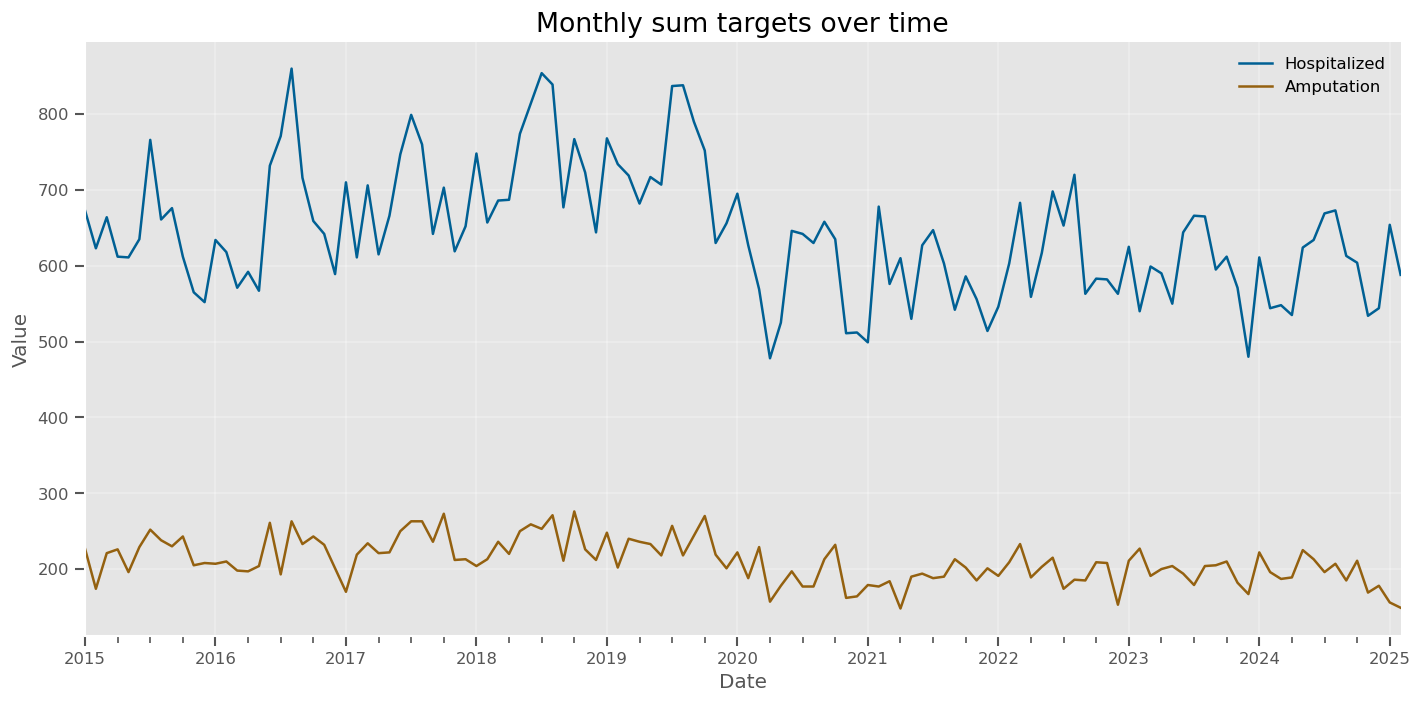


Normality tests for: Hospitalized
Shapiro-Wilk W = 0.9760, p = 0.0279
→ Reject normality (p < 0.05)

Anderson-Darling statistic = 0.7375
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.4987
Kurtosis = -0.0729

Normality tests for: Amputation
Shapiro-Wilk W = 0.9893, p = 0.4582
→ Fail to reject normality (p ≥ 0.05)

Anderson-Darling statistic = 0.2673
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.1693
Kurtosis = -0.3607


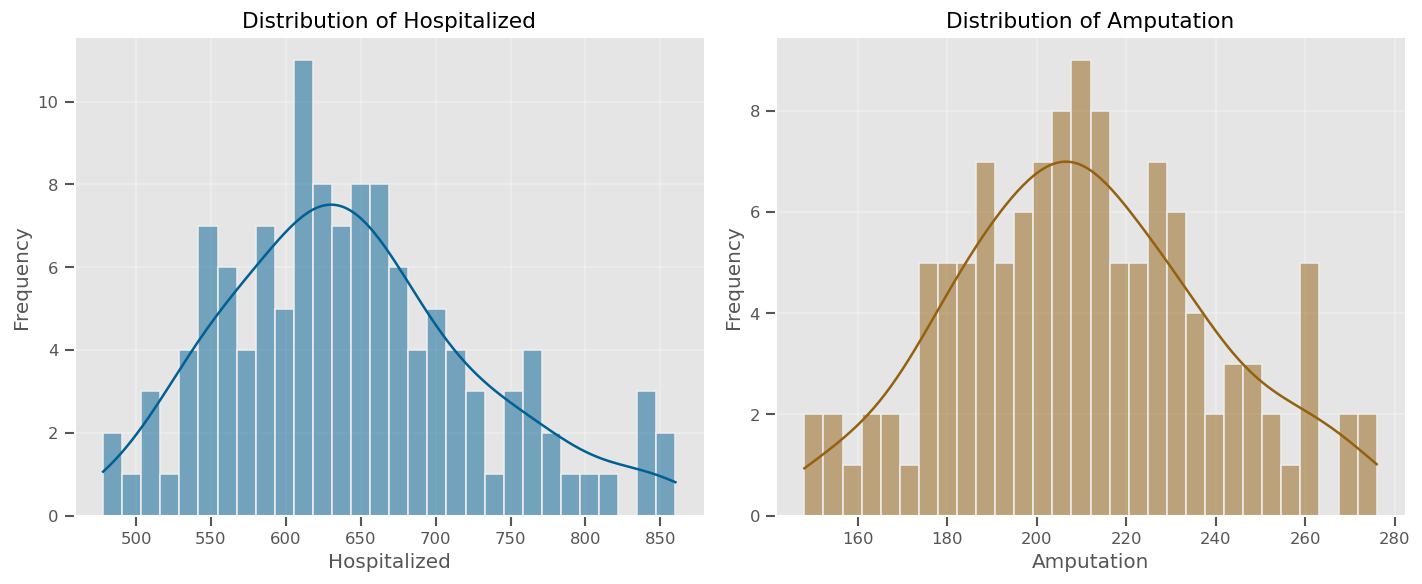

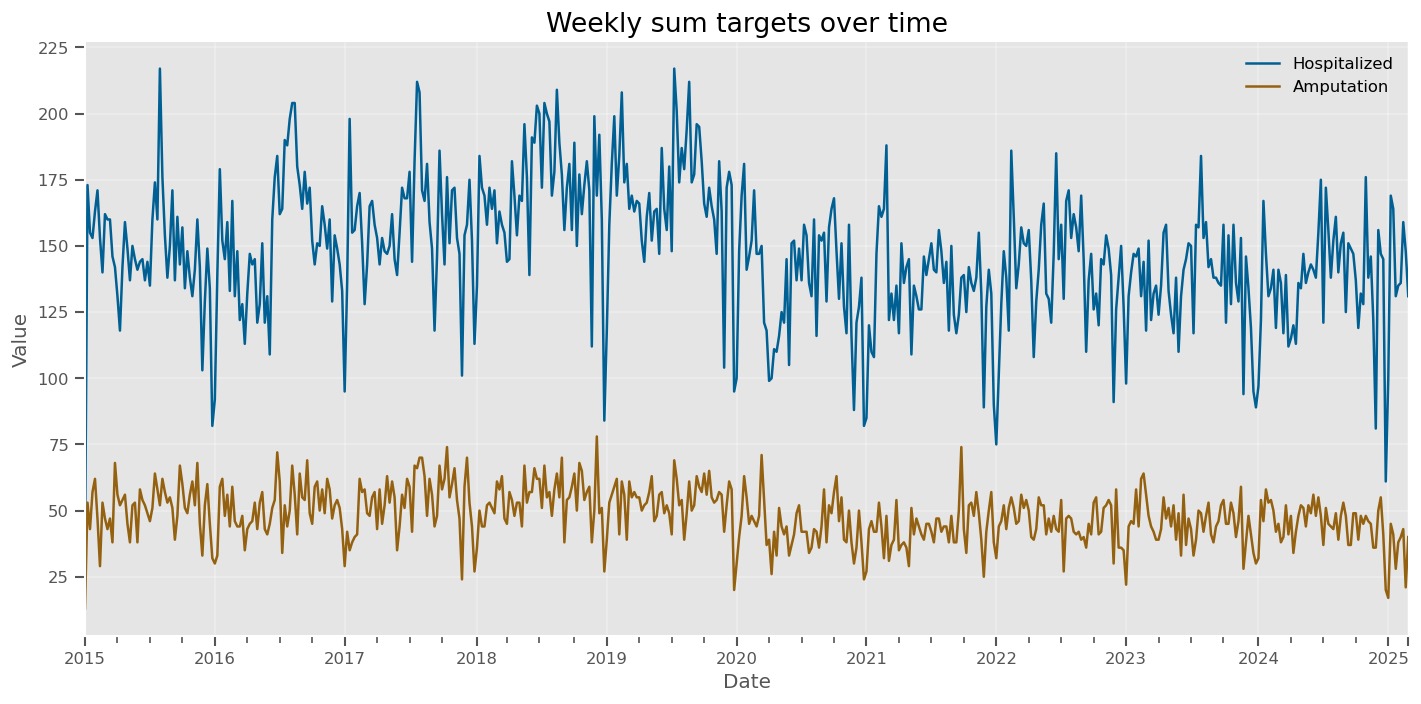


Normality tests for: Hospitalized
Shapiro-Wilk W = 0.9890, p = 0.0005
→ Reject normality (p < 0.05)

Anderson-Darling statistic = 1.3337
Critical values (sig_level %, critical_value):
  15.0%  →  0.5720
  10.0%  →  0.6510
  5.0%  →  0.7810
  2.5%  →  0.9110
  1.0%  →  1.0840

Skewness  = -0.2554
Kurtosis = 0.9643

Normality tests for: Amputation
Shapiro-Wilk W = 0.9957, p = 0.1552
→ Fail to reject normality (p ≥ 0.05)

Anderson-Darling statistic = 0.6077
Critical values (sig_level %, critical_value):
  15.0%  →  0.5720
  10.0%  →  0.6510
  5.0%  →  0.7810
  2.5%  →  0.9110
  1.0%  →  1.0840

Skewness  = -0.1597
Kurtosis = 0.2729


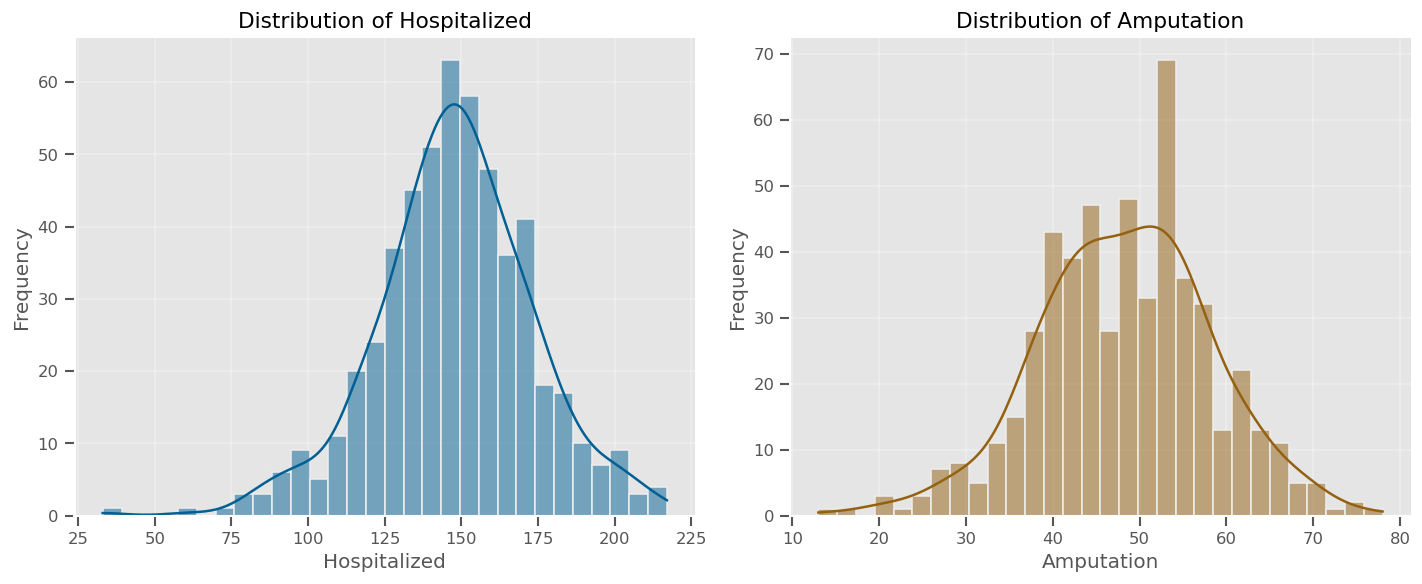

In [95]:
# Global monthly
plot_target_timeseries(df, agg_level="monthly")
plot_target_histograms(df, agg_level="monthly")

# Global weekly
plot_target_timeseries(df, agg_level="weekly")
plot_target_histograms(df, agg_level="weekly")



In [96]:
from src.timeseries_utils import _prepare_series

In [97]:
monthly_h = _prepare_series(df, date_col="EventDate", freq="ME", value_col="Hospitalized")

In [98]:
def plot_ts_with_rolling(
    series: pd.Series,
    window: int = 12,
    title = None,
) -> None:
    """
    Plot time series with rolling mean and rolling std.

    Parameters
    ----------
    series : pd.Series
        Time series with a DatetimeIndex.
    window : int
        Rolling window size (in number of observations).
    title : str, optional
        Plot title.
    """
    roll_mean = series.rolling(window=window).mean()
    roll_std = series.rolling(window=window).std()

    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    ax[0].plot(series.index, series.values, label="Series")
    ax[0].plot(roll_mean.index, roll_mean.values, linestyle="--", label=f"Rolling mean ({window})")
    ax[0].set_ylabel(series.name or "value")
    ax[0].legend()
    if title:
        ax[0].set_title(title)

    ax[1].plot(roll_std.index, roll_std.values, label=f"Rolling std ({window})")
    ax[1].set_ylabel("Rolling std")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

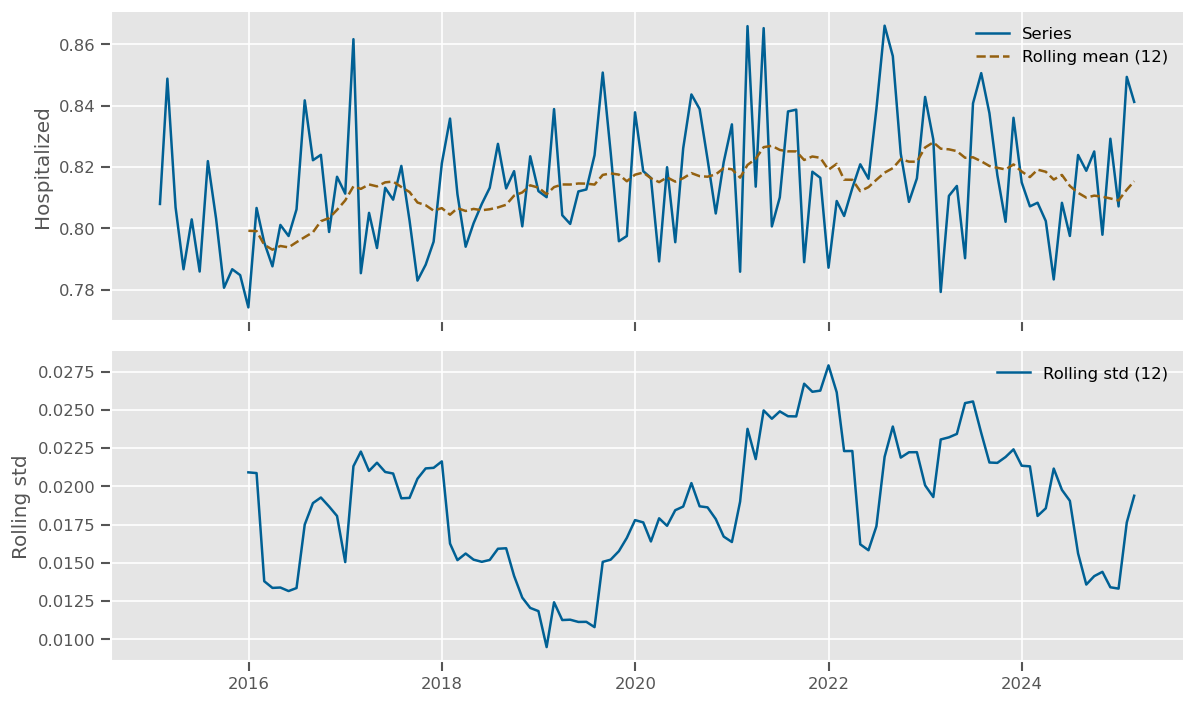

In [99]:
plot_ts_with_rolling(monthly_h)

In [104]:
def plot_monthly_proportion_ridges(
    df: pd.DataFrame,
    date_col: str = "Date",
    value_col: str = "Hospitalized",
):
    """
    Generate ridge-style plots for binary incident-level data
    by showing monthly proportions (mean of 0/1).
    """

    df_ = df[[date_col, value_col]].copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    # Compute monthly proportions (mean of 0/1 = probability)
    df_["Year"] = df_[date_col].dt.year
    df_["Month"] = df_[date_col].dt.month

    monthly = (
        df_.groupby(["Year", "Month"])[value_col]
            .mean()
            .reset_index()
    )

    # Turn month into label
    monthly["MonthName"] = monthly["Month"].apply(lambda m: calendar.month_abbr[m])
    month_order = [calendar.month_abbr[m] for m in range(1, 13)]
    monthly["MonthName"] = pd.Categorical(monthly["MonthName"], month_order, ordered=True)

    plt.figure(figsize=(10, 6))

    sns.kdeplot(
        data=monthly,
        x=value_col,
        hue="MonthName",
        multiple="stack",
        fill=True,
        common_norm=False,
        palette=sns.cubehelix_palette(n_colors=12, light=0.9, start=0.5, rot=-0.75),
    )

    plt.title(f"Monthly density ridges of {value_col} (incident-level probability)", fontsize=14)
    plt.xlabel(f"Probability of {value_col}=1")
    plt.tight_layout()
    plt.show()


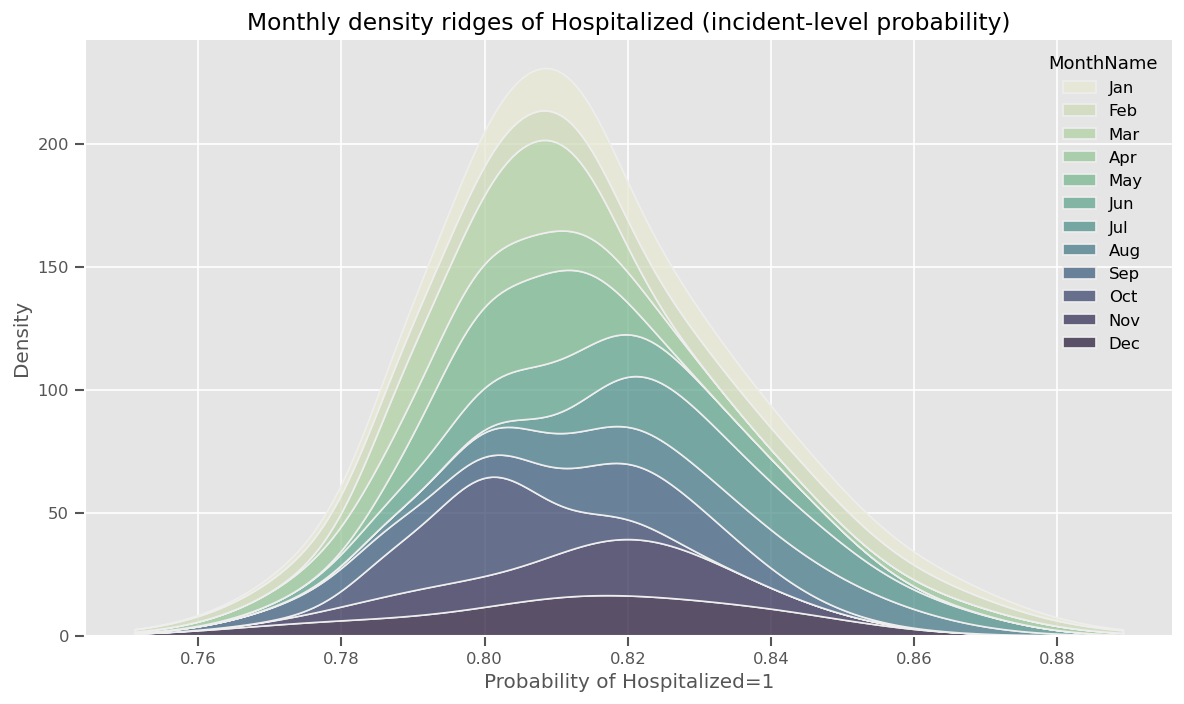

In [105]:
plot_monthly_proportion_ridges(df, date_col="EventDate", value_col="Hospitalized")


In [112]:
def plot_state_ridges(
    df: pd.DataFrame,
    date_col: str = "EventDate",
    value_col: str = "Hospitalized",
    state_col: str = "State",
    top_n: int = 15,          # plot only top N states (set to None to plot all)
    bw_adjust: float = 0.7,
):
    """
    Compact ridge-style KDE plot of monthly probabilities by state.
    Uses 'multiple=layer' to avoid extremely tall figures.
    """
    df_ = df[[date_col, state_col, value_col]].copy()
    df_[date_col] = pd.to_datetime(df_[date_col])
    
    # Compute monthly probabilities
    df_["Year"] = df_[date_col].dt.year
    df_["Month"] = df_[date_col].dt.month
    
    monthly = (
        df_.groupby([state_col, "Year", "Month"])[value_col]
            .mean()
            .reset_index(name="prob")
    )
    
    # Order states by avg prob
    state_order = (
        monthly.groupby(state_col)["prob"]
               .mean()
               .sort_values(ascending=False)
    )
    
    # Select top N states
    if top_n is not None:
        states_to_plot = state_order.index[:top_n]
        monthly = monthly[monthly[state_col].isin(states_to_plot)]
        state_order = state_order[:top_n]
    
    # Apply ordering
    monthly[state_col] = pd.Categorical(
        monthly[state_col],
        categories=state_order.index,
        ordered=True
    )
    
    # Compact figure
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(
        data=monthly,
        x="prob",
        hue=state_col,
        multiple="layer",      # <<< COMPACT
        fill=True,
        bw_adjust=bw_adjust,
        alpha=0.8,
        linewidth=1,
        palette="viridis",
    )
    
    plt.title(f"Monthly probability ridges of {value_col} by state", fontsize=14)
    plt.xlabel(f"Probability of {value_col}=1")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()
    
    return monthly


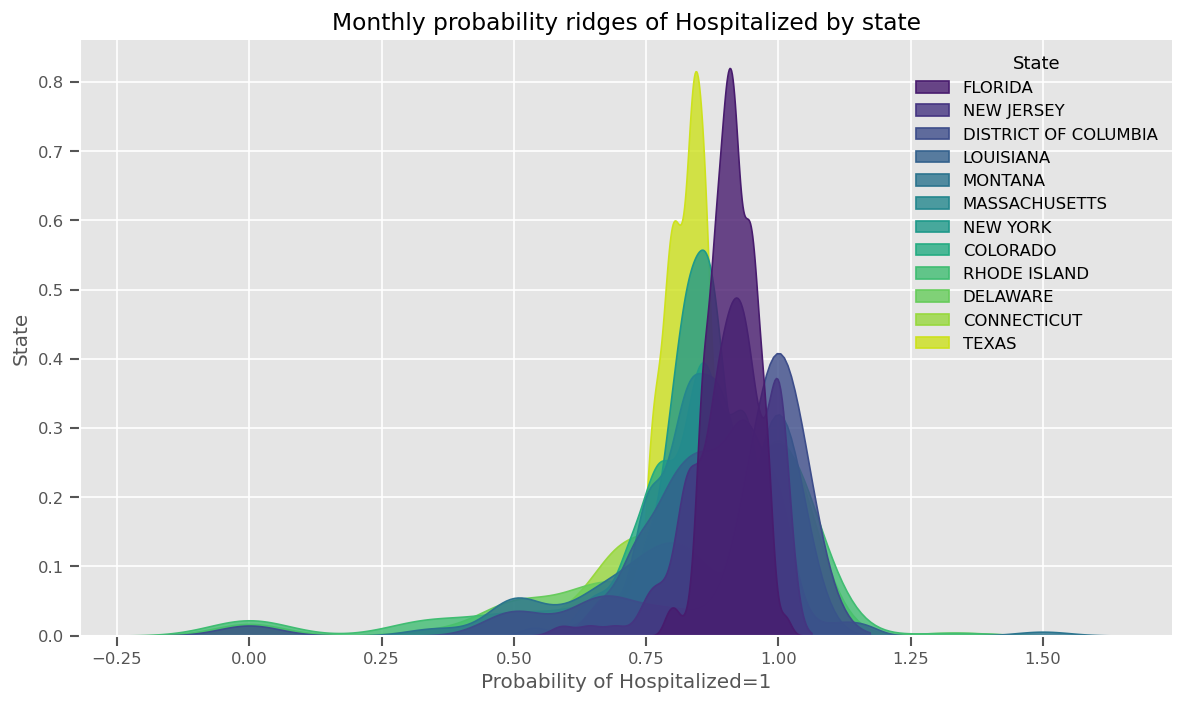

State  Year  Month      prob
244   COLORADO  2015      1  0.900000
245   COLORADO  2015      2  1.000000
246   COLORADO  2015      3  0.950000
247   COLORADO  2015      4  0.821429
248   COLORADO  2015      5  0.863636
...        ...   ...    ...       ...
3388     TEXAS  2024     10  0.764228
3389     TEXAS  2024     11  0.806723
3390     TEXAS  2024     12  0.793388
3391     TEXAS  2025      1  0.839161
3392     TEXAS  2025      2  0.903509

[1443 rows x 4 columns]

In [113]:
plot_state_ridges(df, value_col="Hospitalized", top_n=12)
